In [861]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


<a id='another_cell'></a>


In [862]:
df = pd.read_csv("hcc_dataset.csv") #leitura do dataset

In [863]:
df.columns #diferentes colunas do dataset 

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [864]:
df.head(15) #primeiras 15 linhas do dataset 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
5,Male,No,Yes,No,?,No,No,Yes,No,?,...,396,5.6,0.9,1,10,1.4,53,22,111,Dies
6,Male,No,No,No,?,Yes,Yes,Yes,No,No,...,211,7.3,0.8,5,2.6,2.19,171,126,1452,Dies
7,Male,Yes,Yes,No,?,No,No,Yes,No,Yes,...,300,7.1,0.52,2,9,1.3,42,25,706,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,63,6.1,0.59,1,6.4,1.2,85,73,982,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,303,7.1,0.59,1,9.3,0.7,?,?,?,Lives


# Identificação do tipo de variáveis 



Temos um total de 49 variáveis das quais:

23 são variáveis quantitativas:'Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin'    
    
26 são variáveis qualitativas:  'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites'


# Situações anómalas 



## Dados em falta 



 
A existências de pontos de interrogação ou de espaços vazios é uma destas situações, aplicando as funções em baixo, conseguimos identificar o número destas situações para cada uma das variáveis.

In [865]:
for col in df.columns:
    quant = df.loc[df[col]=="?",col].value_counts()
    if not quant.empty and len(quant) > 0:          
        display(pd.DataFrame(quant))
#Testa a existência de "?"

,count
Symptoms,
?,18


,count
HBsAg,
?,17


,count
HBeAg,
?,39


,count
HBcAb,
?,24


,count
HCVAb,
?,9


,count
Endemic,
?,39


,count
Smoking,
?,41


,count
Diabetes,
?,3


,count
Obesity,
?,10


,count
Hemochro,
?,23


,count
AHT,
?,3


,count
CRI,
?,2


,count
HIV,
?,14


,count
NASH,
?,22


,count
Varices,
?,52


,count
Spleno,
?,15


,count
PHT,
?,11


,count
PVT,
?,3


,count
Metastasis,
?,4


,count
Hallmark,
?,2


,count
Grams_day,
?,48


,count
Packs_year,
?,53


,count
Encephalopathy,
?,1


,count
Ascites,
?,2


,count
INR,
?,4


,count
AFP,
?,8


,count
Hemoglobin,
?,3


,count
MCV,
?,3


,count
Leucocytes,
?,3


,count
Platelets,
?,3


,count
Albumin,
?,6


,count
Total_Bil,
?,5


,count
ALT,
?,4


,count
AST,
?,3


,count
GGT,
?,3


,count
ALP,
?,3


,count
TP,
?,11


,count
Creatinine,
?,7


,count
Nodules,
?,2


,count
Major_Dim,
?,20


,count
Dir_Bil,
?,44


,count
Iron,
?,79


,count
Sat,
?,80


,count
Ferritin,
?,80


Existe um total de 826 "?". O maior número de ocorrências por variável foi de 80 e 79, estes valores foram verificados nas variáveis 'Iron', 'Sat' e 'Ferritin' 

In [866]:
for col in df.columns:
    print(df[col].isnull().value_counts())
    #Contagem dos valores nulos por variáveis  

Gender
False    165
Name: count, dtype: int64
Symptoms
False    165
Name: count, dtype: int64
Alcohol
False    165
Name: count, dtype: int64
HBsAg
False    165
Name: count, dtype: int64
HBeAg
False    165
Name: count, dtype: int64
HBcAb
False    165
Name: count, dtype: int64
HCVAb
False    165
Name: count, dtype: int64
Cirrhosis
False    165
Name: count, dtype: int64
Endemic
False    165
Name: count, dtype: int64
Smoking
False    165
Name: count, dtype: int64
Diabetes
False    165
Name: count, dtype: int64
Obesity
False    165
Name: count, dtype: int64
Hemochro
False    165
Name: count, dtype: int64
AHT
False    165
Name: count, dtype: int64
CRI
False    165
Name: count, dtype: int64
HIV
False    165
Name: count, dtype: int64
NASH
False    165
Name: count, dtype: int64
Varices
False    165
Name: count, dtype: int64
Spleno
False    165
Name: count, dtype: int64
PHT
False    165
Name: count, dtype: int64
PVT
False    165
Name: count, dtype: int64
Metastasis
False    165
Name: count, dtyp

Existe um total de 251 células vazias, no entanto, todas estas células vazias representam a ausência de uma característica qualitativa e não a ausência de dados, como tal iremos transformar todos os espaços vazios em "None"  

In [867]:
for col in df.columns:
    df.loc[df[col].isnull(),col] = str("Nada")

/tmp/ipykernel_3180/2366549364.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Nada' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isnull(),col] = str("Nada")


Como parte do pré-processamento vamos transformar todos os "?" em valores   NaN

In [868]:
for col in df.columns:
    df.loc[df[col]=="?",col] =float('NaN')

In [869]:
#Verificar se os "?" foram alterados para NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        147 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           148 non-null    object
 4   HBeAg           126 non-null    object
 5   HBcAb           141 non-null    object
 6   HCVAb           156 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         126 non-null    object
 9   Smoking         124 non-null    object
 10  Diabetes        162 non-null    object
 11  Obesity         155 non-null    object
 12  Hemochro        142 non-null    object
 13  AHT             162 non-null    object
 14  CRI             163 non-null    object
 15  HIV             151 non-null    object
 16  NASH            143 non-null    object
 17  Varices         113 non-null    object
 18  Spleno    

## Uniformidade das strings nas variáveis 




Outra anomalia potêncial trata-se da não uniformidade das palavras nas variáveis qualitativas.

In [870]:
variaveis = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites']
for var in variaveis:
    print(df[var].unique())
    print(5*"-")

    #Ver as diferentes opções de resposta às variáveis qualitativas 

['Male' 'Female']
-----
['No' nan 'Yes']
-----
['Yes' 'No']
-----
['No' 'Yes' nan]
-----
['No' nan 'Yes']
-----
['No' 'Yes' nan]
-----
['No' 'Yes' nan]
-----
['Yes' 'No']
-----
['No' nan 'Yes']
-----
['Yes' nan 'No']
-----
['Yes' 'No' nan]
-----
[nan 'No' 'Yes']
-----
['Yes' 'No' nan]
-----
['No' 'Yes' nan]
-----
['No' 'Yes' nan]
-----
['No' nan 'Yes']
-----
['No' nan 'Yes']
-----
['Yes' 'No' nan]
-----
['No' 'Yes' nan]
-----
['No' 'Yes' nan]
-----
['No' 'Yes' nan]
-----
['No' 'Yes' nan]
-----
['Yes' 'No' nan]
-----
['Active' 'Ambulatory' 'Restricted' 'Selfcare' 'Disabled']
-----
['Nada' 'Grade I/II' nan 'Grade III/IV']
-----
['Nada' 'Mild' 'Moderate/Severe' nan]
-----


Após a aplicação desta função podemos concluir que não existe nenhuma anomalia deste gênero

## Tipo de variáveis 



Reparamos também que todas as váriáveis estavam classificadas como objetos

In [871]:
columns = ['Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']

for col in columns:
    df[col]= df[col].astype(float)

Utilizamos a função anterior de modo a transformar algumas das variáveis quantitativas em float. 

In [872]:
df.describe()

,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,...,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,...,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,...,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,...,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,...,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,...,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,...,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,...,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Podemos assim verificar que alteração foi realizada corretamente

## Valores negativos 

Atendendo ao tipo de variáveis, não é permitido valores negativos para as mesmas, logo faz sentido fazermos uma verificação.

In [873]:
columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']

for col in columns:
    negative = df.loc[df[col] < 0,col]
    if not negative.empty and len(negative) > 0:
       display(pd.DataFrame(negative))

A partir da função anterior podemos verificar que não exite nenhum valor negativo. 



# Análise dos dados 




## Variáveis quantitativas 

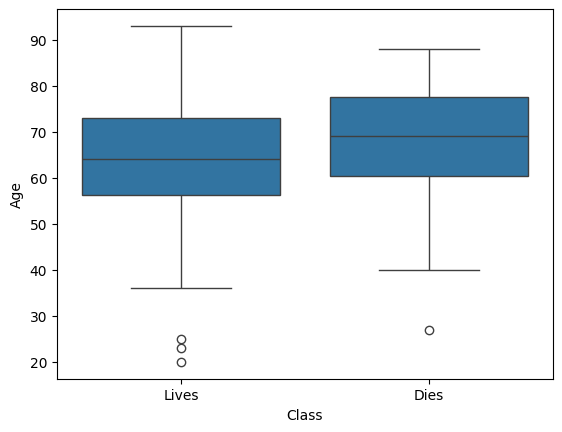

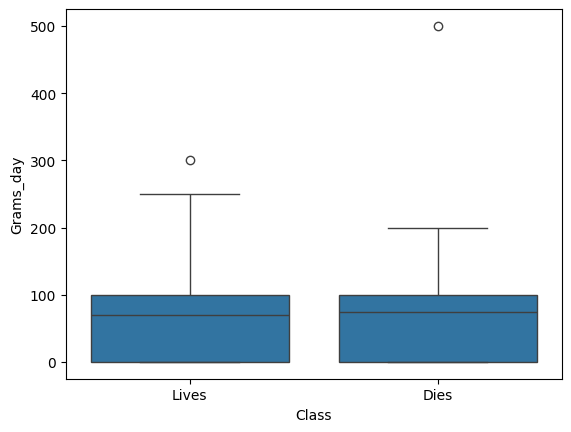

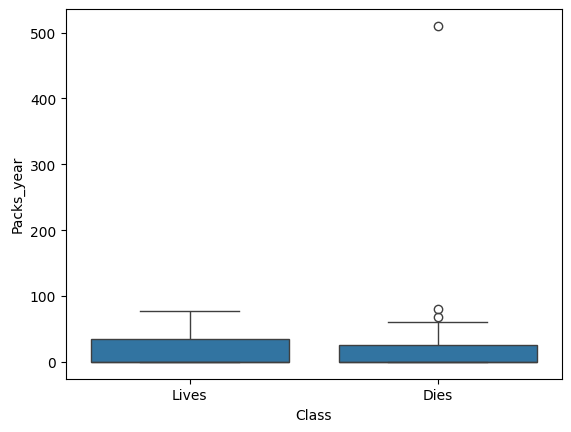

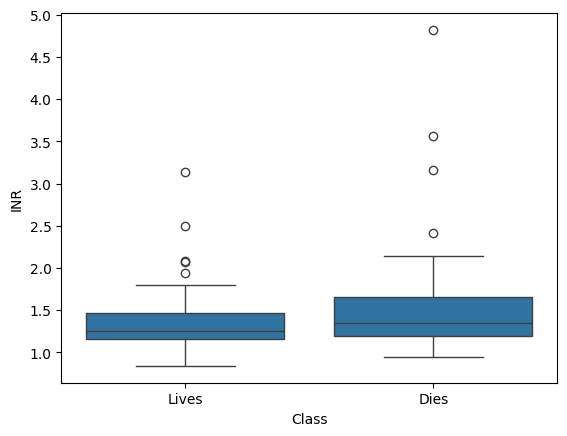

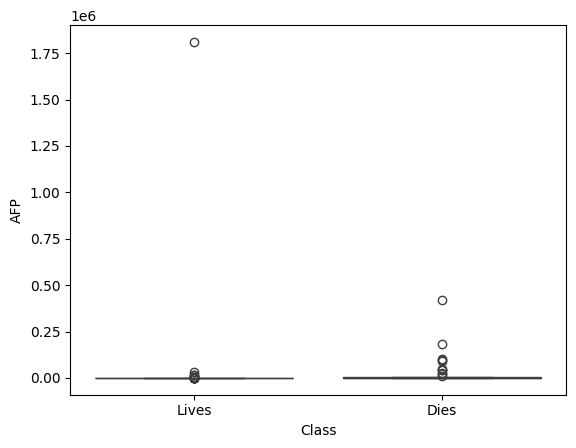

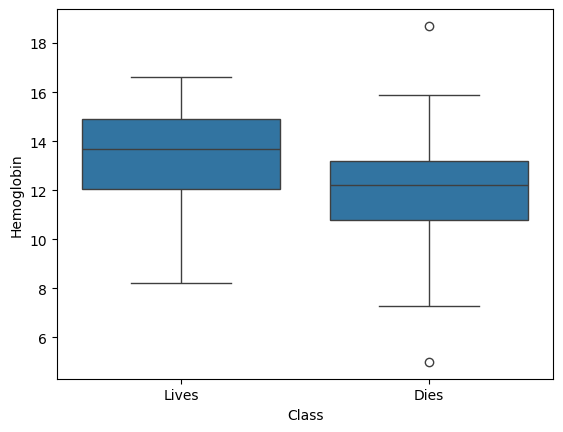

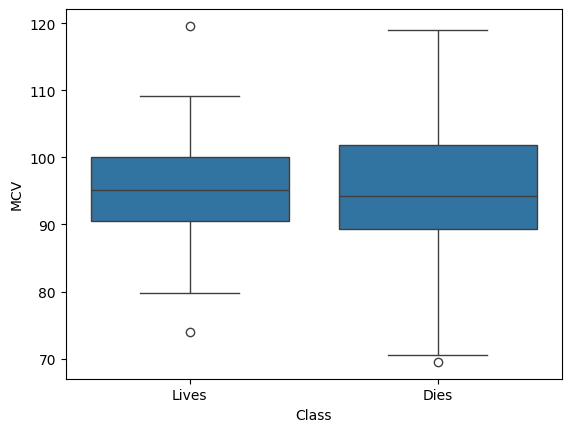

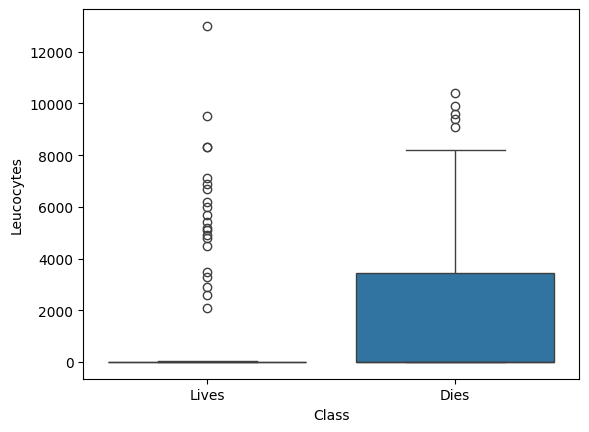

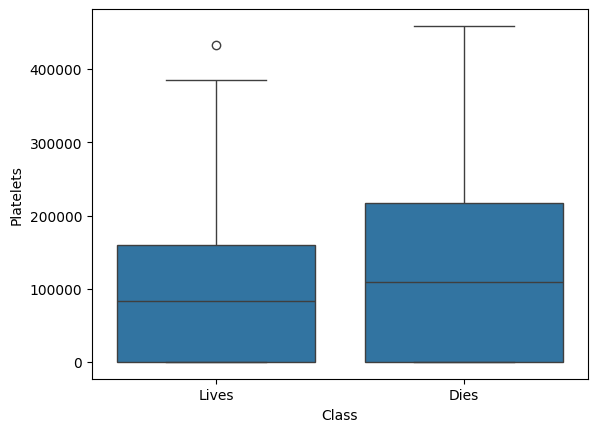

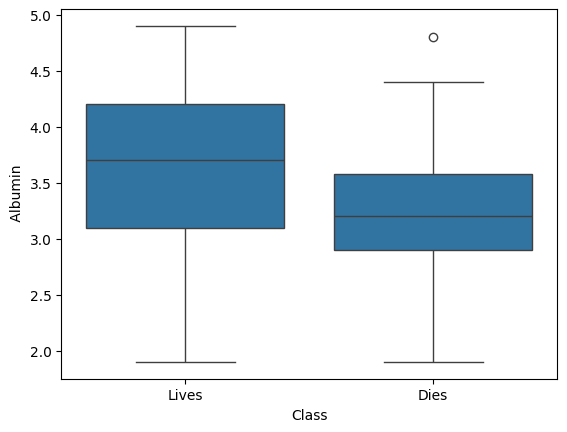

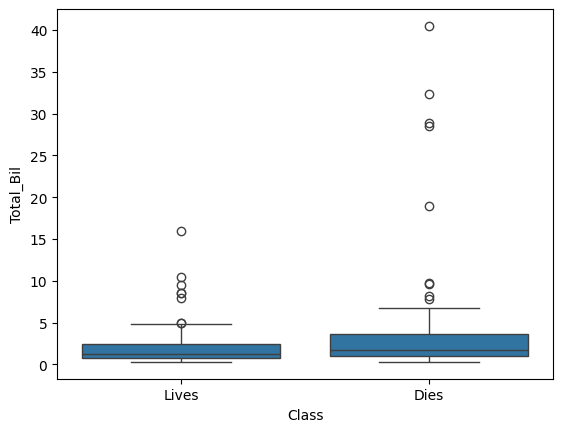

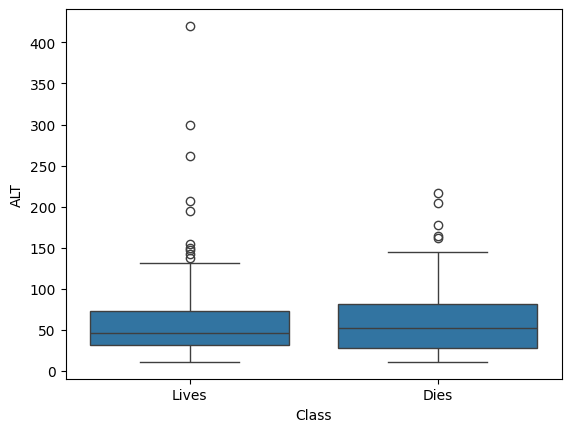

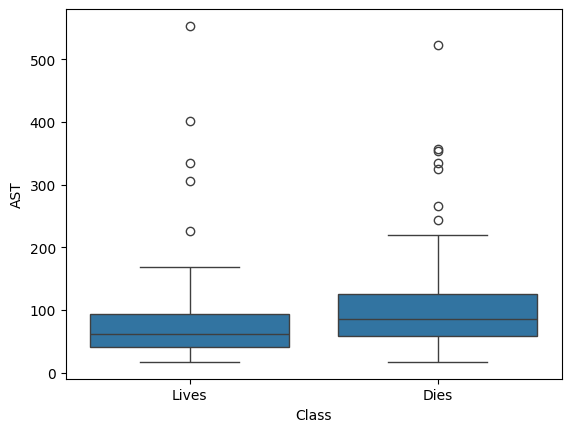

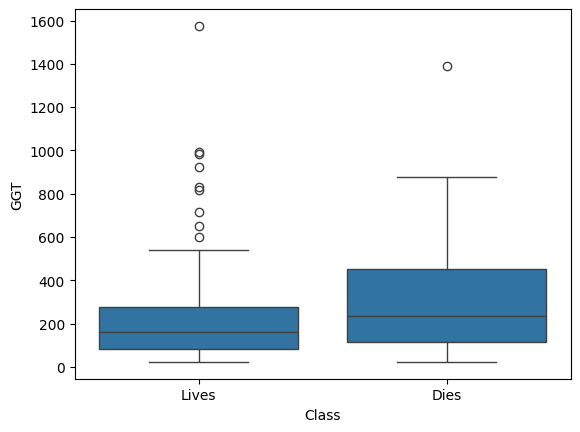

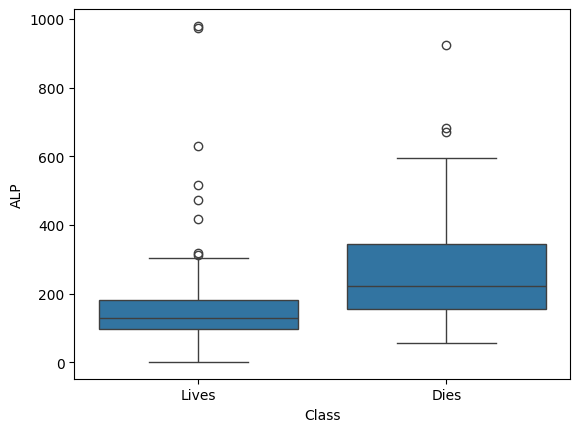

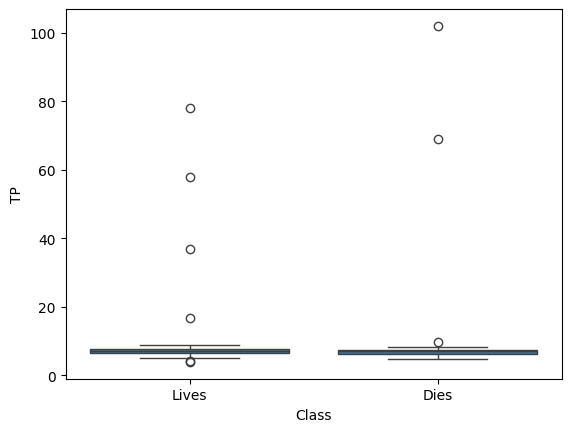

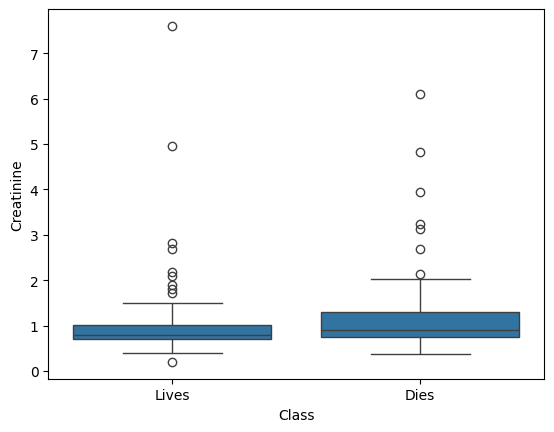

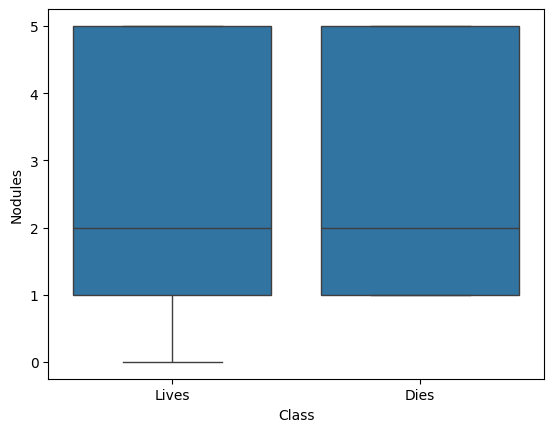

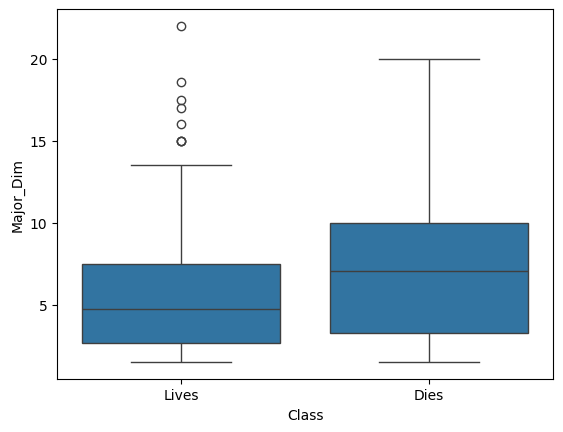

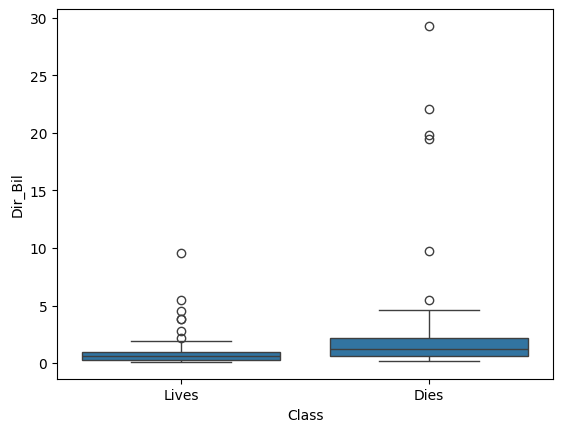

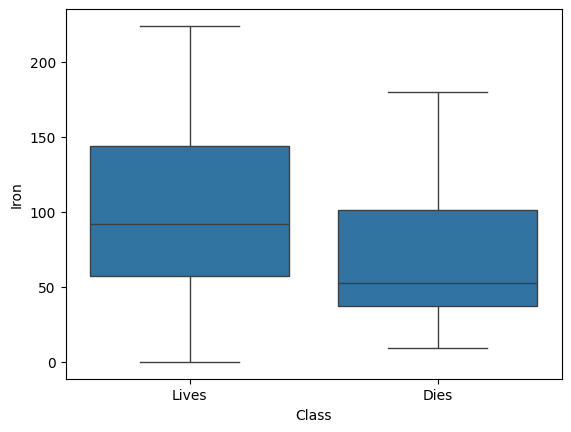

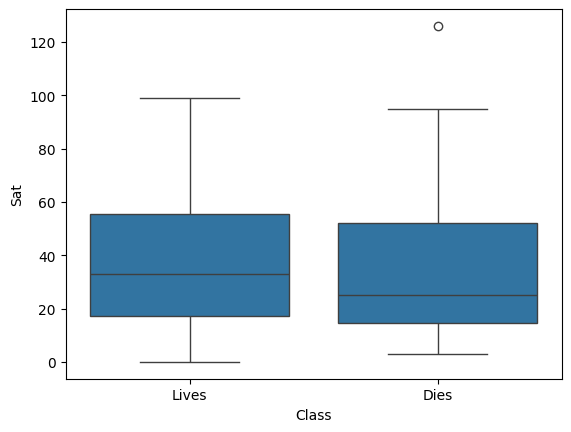

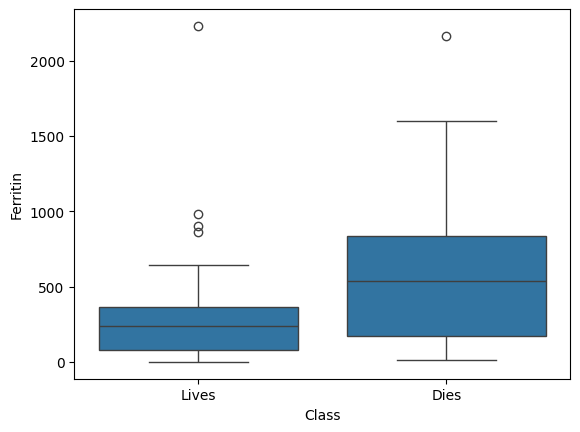

In [874]:
variaveis = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']

for var in variaveis:
    sns.boxplot(x="Class",y=var,data = df)
    plt.show()

    #Criação de boxplotes das variáveis quantitativas 


Apartir destes gŕaficos já podemos tirar conclusões. Quando as boxplots da mesma variável diferem entre si para as diferentes classes, é de prever que esta variável tenha um impacto maior na classificação. Como alguns destes gráficos apresentam outliers que dificultam a visualização da distribuição dos valores por classes, vamos realizar a remoção de alguns outliers, de modo a formar novos gŕaficos que permitem uma melhor visualização dos mesmos. 
As alterções realizadas são listadas em baixo, sendo apresentada para cada variável o valor limite acima do qual os dados para essa variável são removidos.

Grams_day -- > 500      
Packs_year -- > 500      
INR       -- > 3.5      
AFP       -- > 0.5 * 10^6      
Total_bil -- > 25      
ALT       -- > 250      
AST       -- > 350      
GGT       -- > 1200     
TP        -- > 25   
Creatine  -- > 4.5  
Dir_Bil   -- > 15   


In [875]:


df_without_outliers = deepcopy(df) #criação de um novo dataset, sem afetar o dataset df 

#remoção dos valores previamnete indicados 

df_without_outliers.loc[df_without_outliers["Grams_day"] >= 500,"Grams_day"] = float("NaN")
df_without_outliers.loc[df_without_outliers["Packs_year"] >= 500,"Packs_year"]= float("NaN")
df_without_outliers.loc[df_without_outliers["INR"] >= 3.5,"INR"] = float("NaN")
df_without_outliers.loc[df_without_outliers["Total_Bil"] >= 25,"Total_Bil"] = float("NaN")
df_without_outliers.loc[df_without_outliers["AFP"] >= 20000,"AFP"] = float("NaN")
df_without_outliers.loc[df_without_outliers["ALT"] >= 250,"ALT"] = float("NaN")
df_without_outliers.loc[df_without_outliers["AST"] >= 350,"AST"] = float("NaN")
df_without_outliers.loc[df_without_outliers["GGT"] >= 1200,"GGT"] = float("NaN")
df_without_outliers.loc[df_without_outliers["TP"] >= 25,"TP"] = float("NaN")
df_without_outliers.loc[df_without_outliers["Creatinine"] >= 4.5,"Creatinine"] = float("NaN")
df_without_outliers.loc[df_without_outliers["Dir_Bil"] >= 15,"Dir_Bil"] = float("NaN")



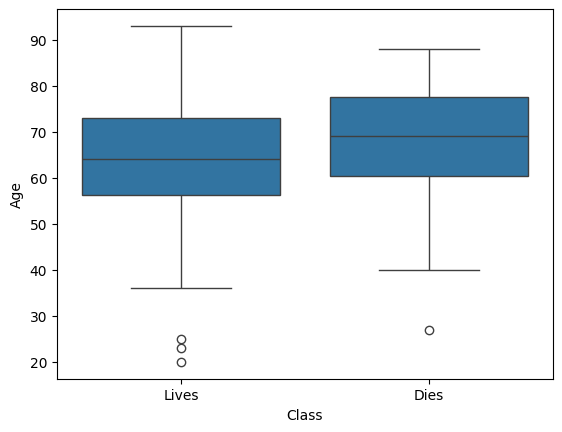

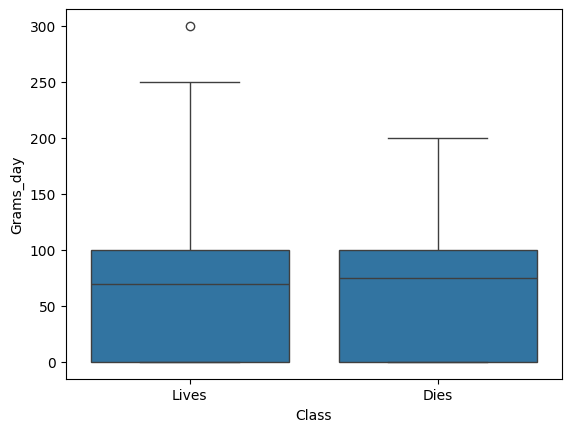

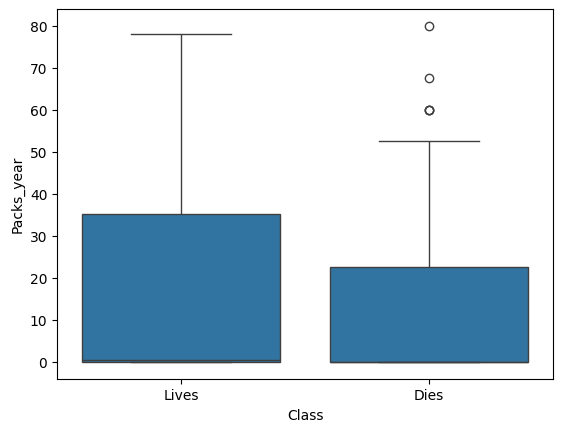

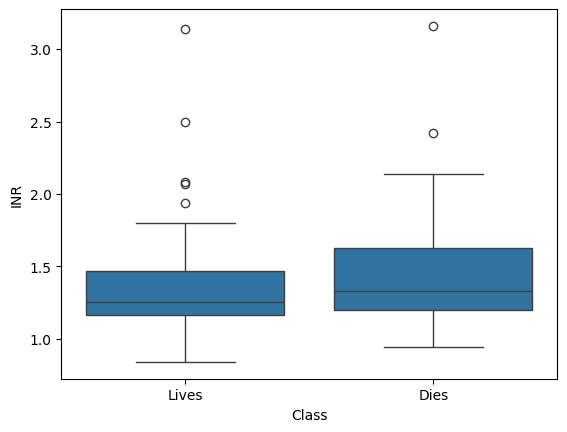

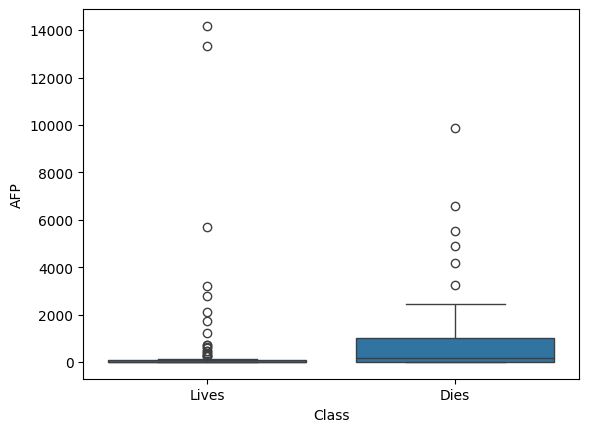

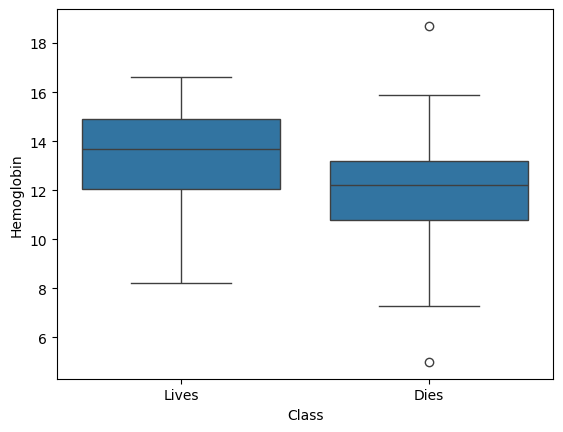

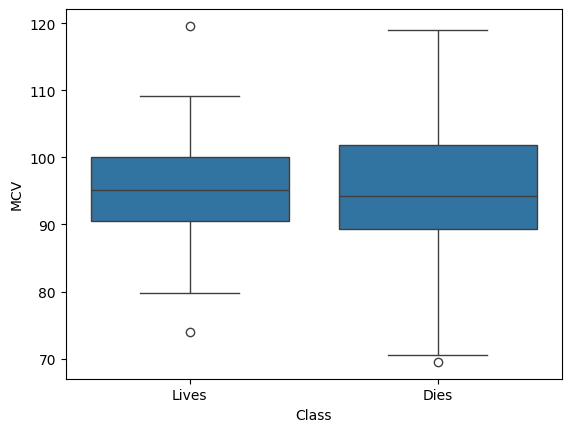

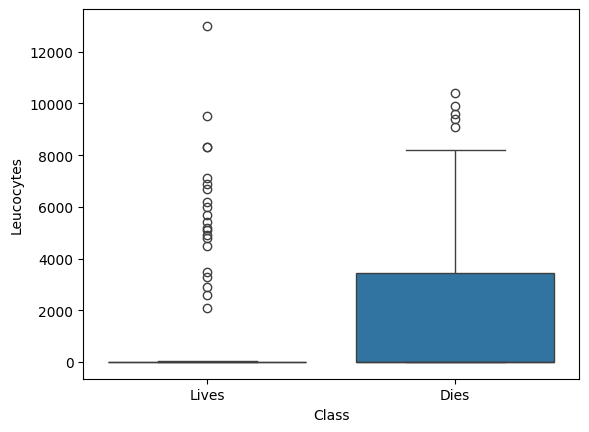

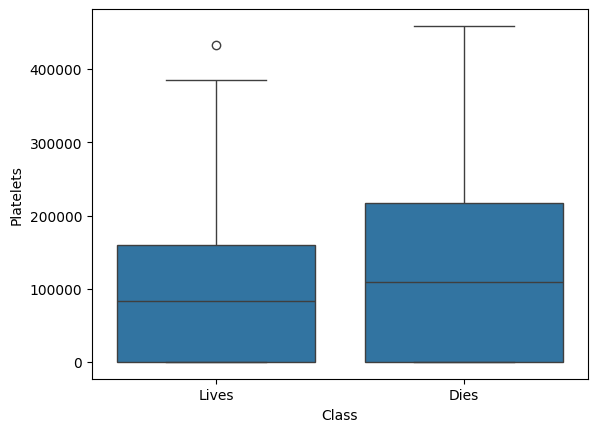

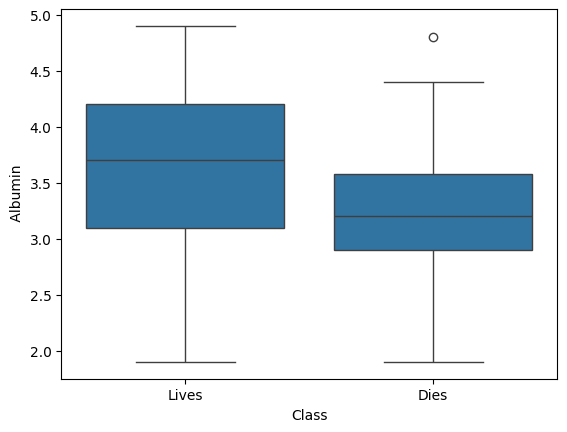

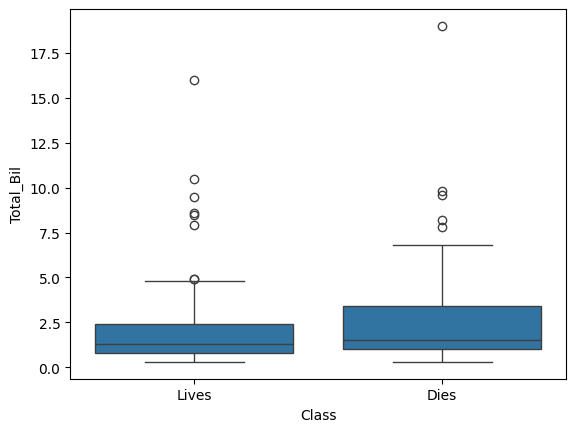

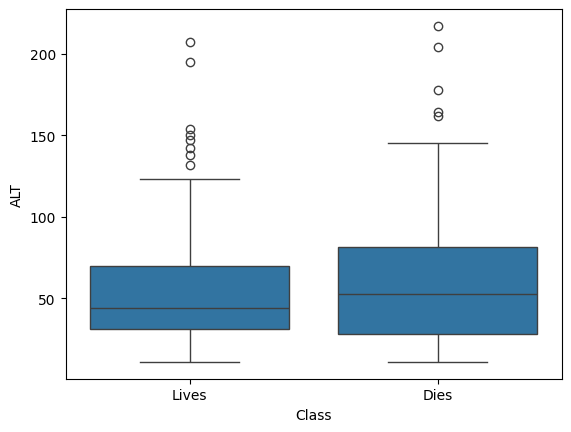

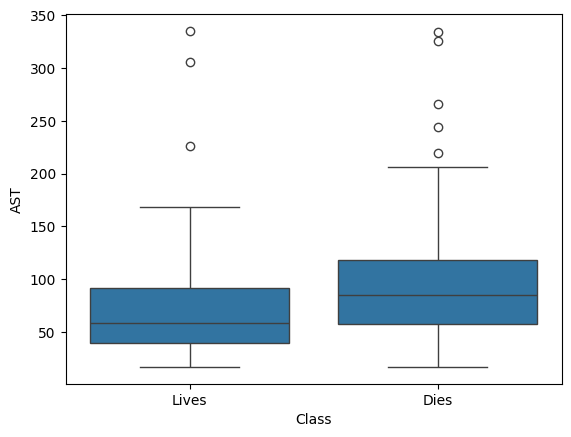

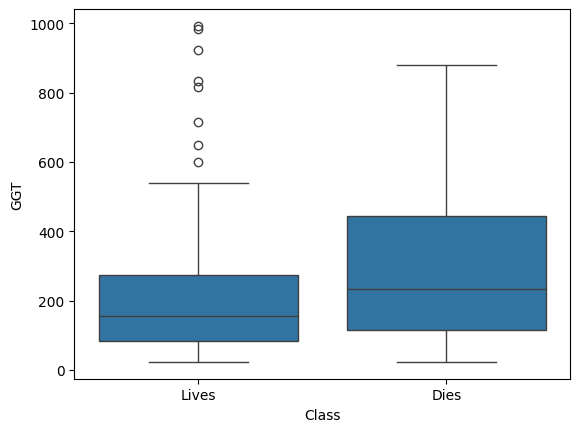

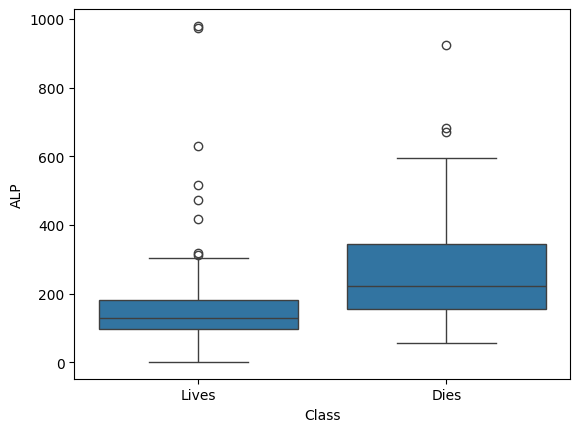

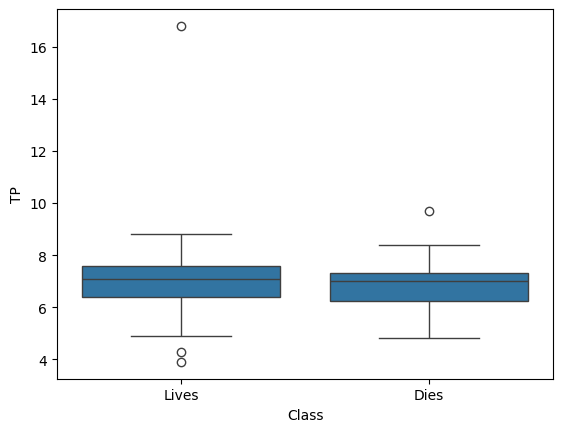

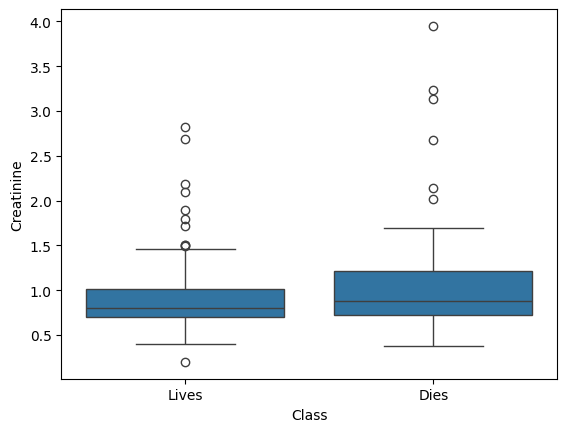

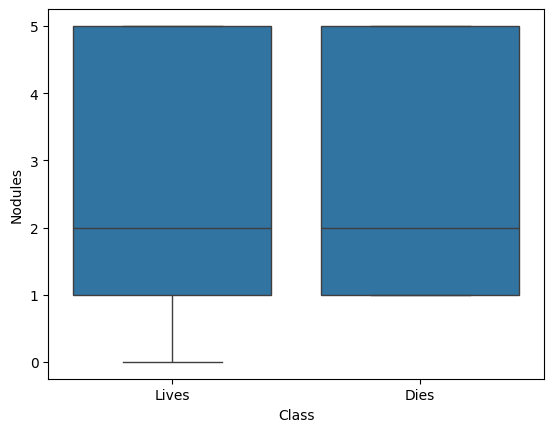

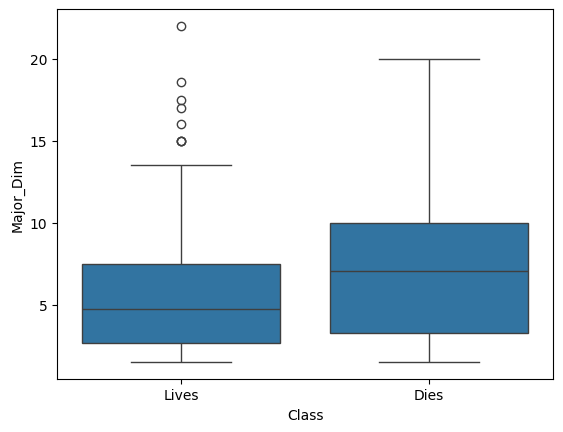

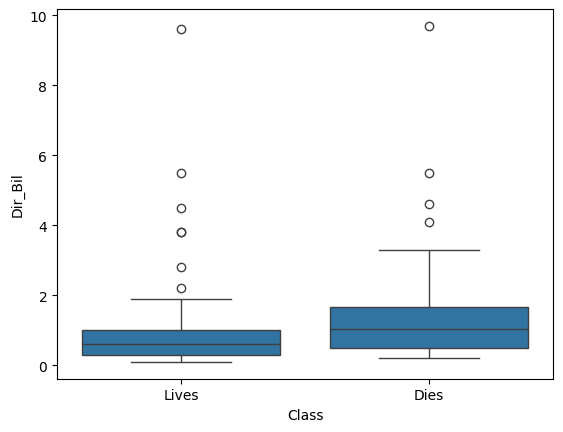

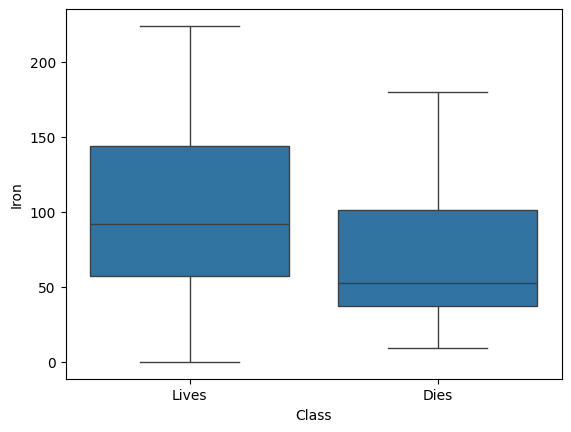

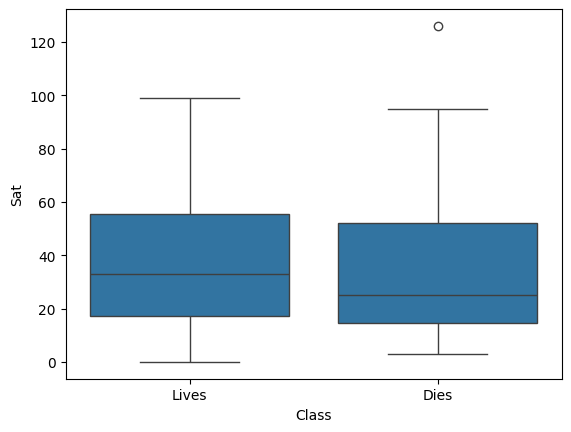

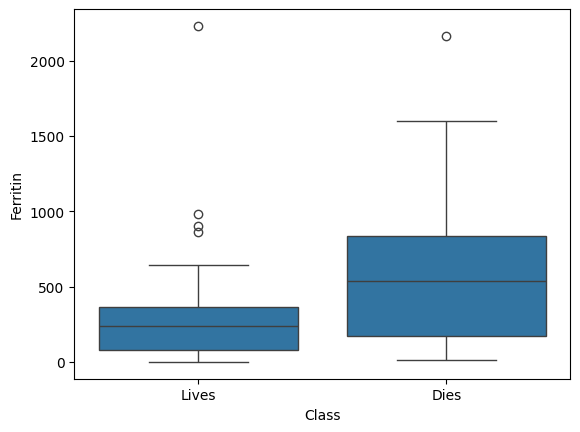

In [876]:
#Refazer os gráficos após as alterações 
variaveis = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']

for var in variaveis:
    sns.boxplot(x="Class",y=var,data = df_without_outliers)
    plt.show()

#### Variáveis quantitativas de maior impacto 

Durante a nossa análise das variáveis quantitativas, podemos conlcuir que as variáveis "Packs_Year", "INR", "AFP", "Hemogloblin", "Leucocytes", "Plateletes", "Albumin", "Total_Bil", "ALT", "AST", "GGT", "ALP", "Creatinine", "Major_Dim", "Dir_Bil", "Iron" e "Ferritin"  parecem ser as mais relevantes para a classificação.

### Remoção de potênciais valores anómalos 

Com a análise deste gráficos reparamos também na exestência de um valor da variável AFP que se distancia demasiado dos restantes e, como tal,  decidimos removê-lo de modo permanente do nosso dataset uma vez que este aparenta ser um valor errado e não um valor real extremo. 

In [877]:
#Remoção permanente do valor do dataset 

df.loc[df["AFP"] >= 1750000,"AFP"] = float("NaN")

### Correlation Matrix 

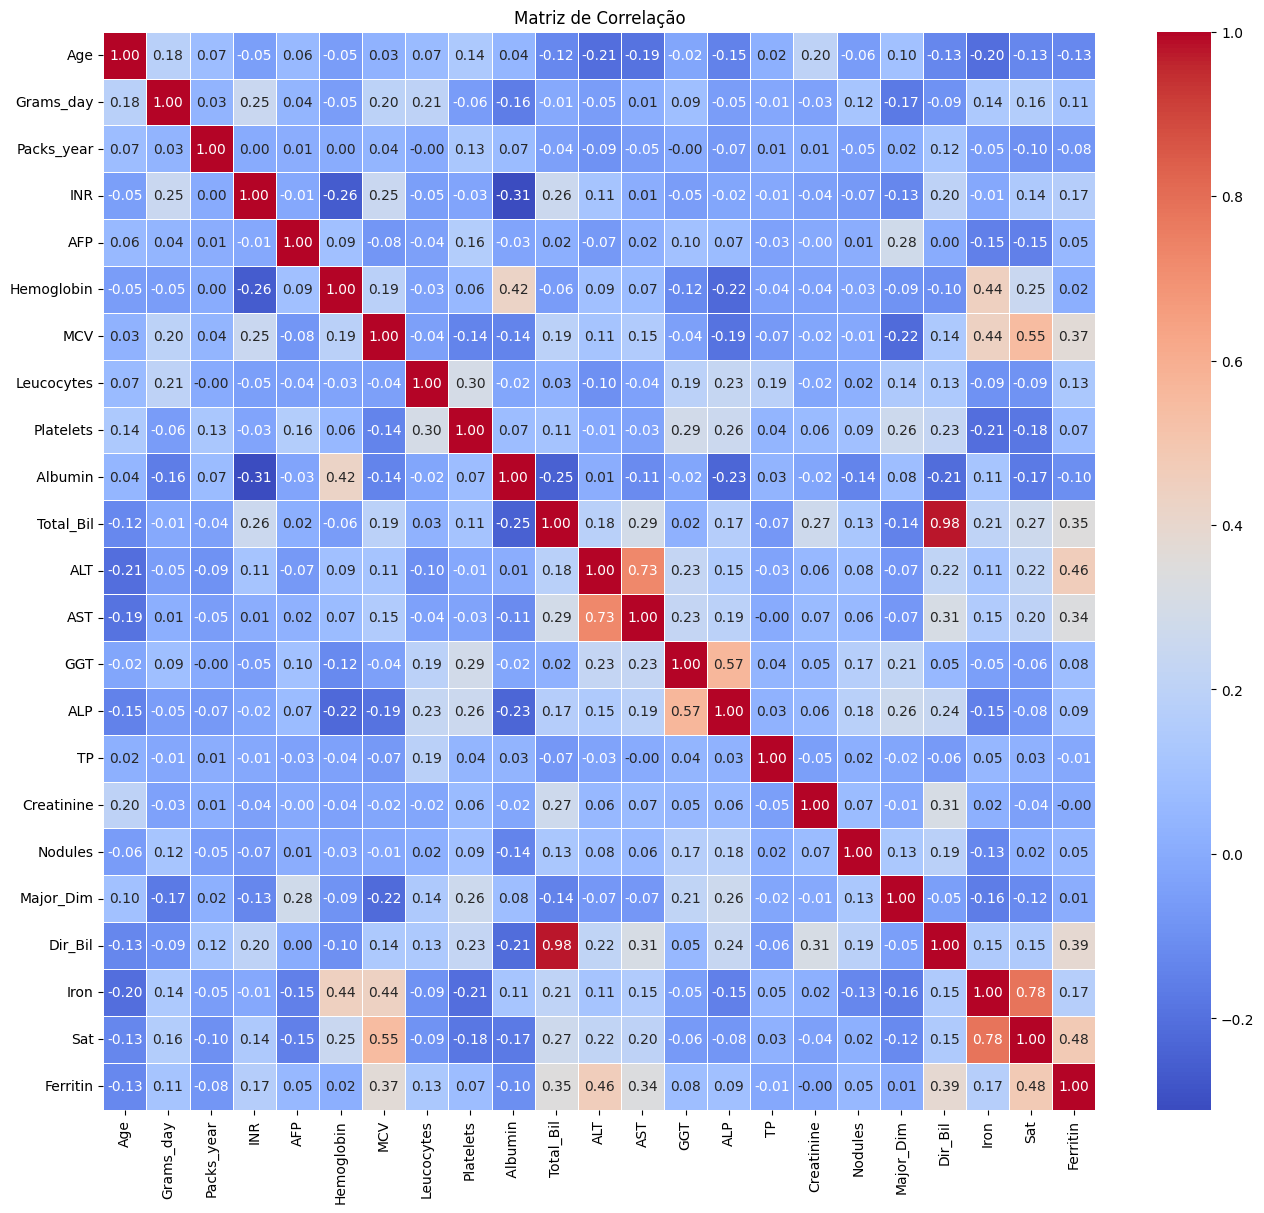

In [878]:
variaveis = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']

df_correlation = df[variaveis]

matriz_correlacao = df_correlation.corr()

plt.figure(figsize=(16, 14))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlação')

plt.show()

#Criação de uma Matriz de Correlação 

Como consideramos que Dir_Bil e Total_Bil estão muito correlacionadas iremos remover a variável Dir_Bil do nosso dataset.

In [879]:
df = df.drop(columns=['Dir_Bil']) #Remoção da coluna da variável 

## Variáveis qualitativas 



Vamos agora também criar os gráficos das variáveis qualitativas. 
Para tal vamos transformar todas as variáveis nos respetivos valores percentuais por classe para cada variável, ou seja, a percentagem de pessoas com a característica  dentro das que sobreviveram e a percentagem de pessoas com a característica dentro das que morreram. 

      Variable      Alive       Dead
0         Male  79.411765  82.539683
1     Symptoms  51.764706  80.645161
2      Alcohol  72.549020  76.190476
3        HBsAg  11.578947   9.433962
4        HBeAg   0.000000   2.173913
5        HBcAb  28.571429  24.000000
6        HCVAb  18.181818  28.070175
7    Cirrhosis  91.176471  88.888889
8      Endemic  10.256410   4.166667
9      Smoking  53.846154  45.652174
10    Diabetes  30.303030  41.269841
11     Obesity  13.541667  11.864407
12    Hemochro   4.210526   6.382979
13         AHT  39.000000  32.258065
14         CRI  10.000000  15.873016
15         HIV   2.083333   1.818182
16        NASH   6.666667   3.773585
17     Varices  62.820513  57.142857
18      Spleno  54.838710  57.894737
19         PHT  69.892473  73.770492
20         PVT  15.151515  33.333333
21  Metastasis  14.141414  35.483871
22    Hallmark  69.000000  66.666667


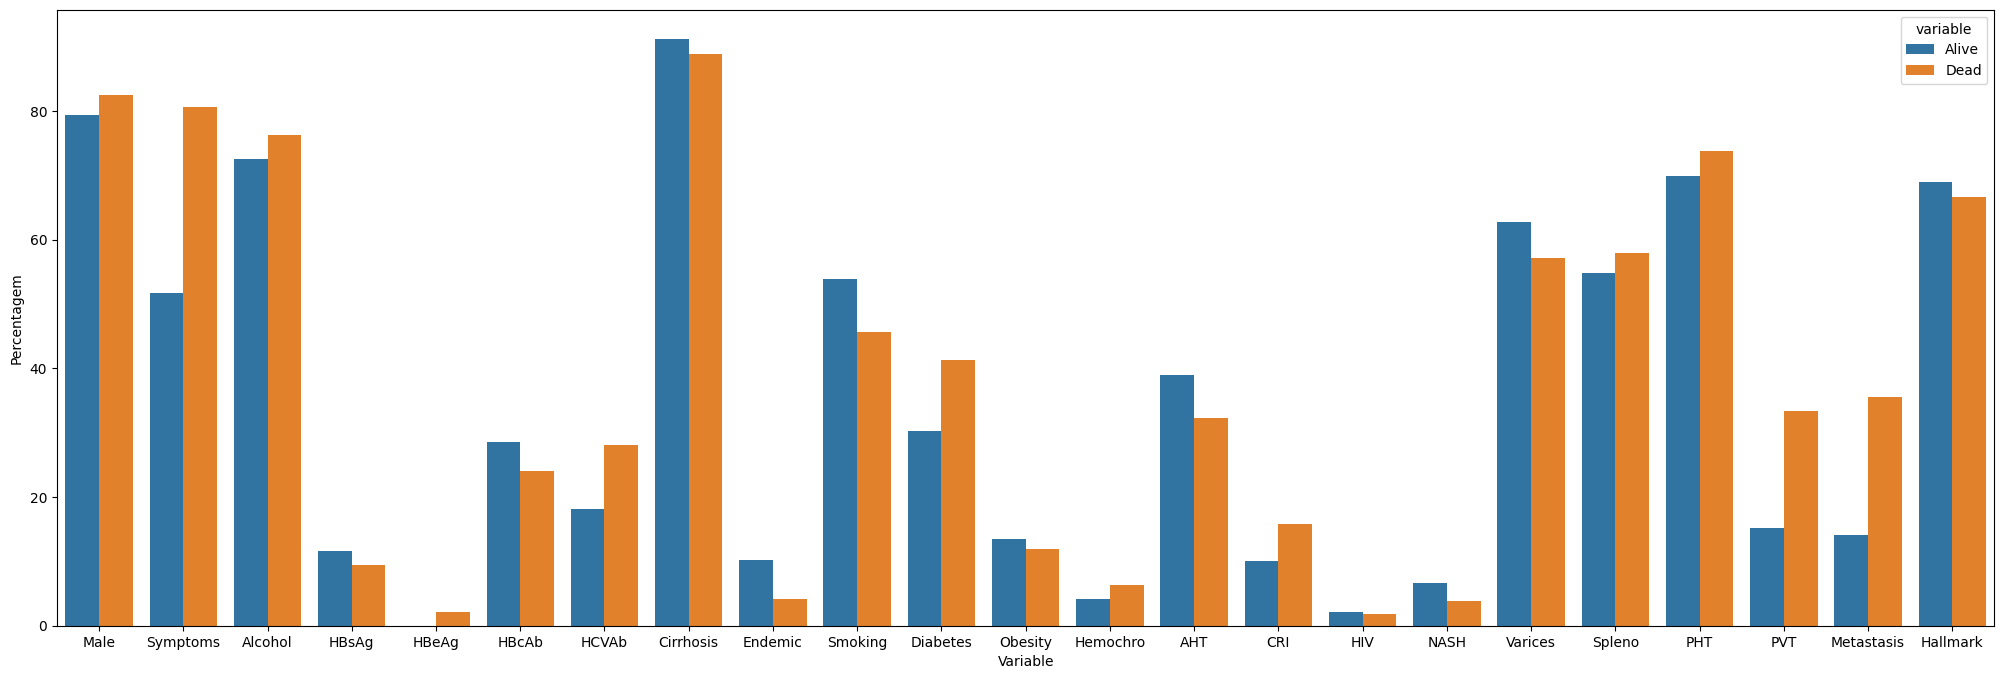

In [880]:
variaveis =['Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark']

results = []

vivos_homens = df.loc[(df["Gender"] == "Male") & (df["Class"] == "Lives")].shape[0]
vivos_mulheres = df.loc[(df["Gender"] == "Female") & (df["Class"] == "Lives")].shape[0]

mortos_homens = df.loc[(df["Gender"] == "Male") & (df["Class"] == "Dies")].shape[0]
mortos_mulheres = df.loc[(df["Gender"] == "Female") & (df["Class"] == "Dies")].shape[0]

results.append({'Variable': "Male", 'Alive': (vivos_homens/(vivos_homens+vivos_mulheres))*100, 'Dead': (mortos_homens/(mortos_homens+mortos_mulheres))* 100}) # Percentagens para a variável "Gender"

for col in variaveis:
       yes_vivos = df.loc[(df[col] == "Yes") & (df["Class"] == "Lives")].shape[0]
       no_vivos =  df.loc[(df[col] == "No") & (df["Class"] == "Lives")].shape[0]

       yes_mortos = df.loc[(df[col] == "Yes") & (df["Class"] == "Dies")].shape[0]
       no_mortos = df.loc[(df[col] == "No") & (df["Class"] == "Dies")].shape[0]

       results.append({'Variable': col, 'Alive': (yes_vivos/(yes_vivos + no_vivos)) * 100, 'Dead': (yes_mortos/(yes_mortos+no_mortos)) * 100}) # Percentagens das restantes variáveis de respostas "Yes" "No"

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(25, 8))
plt.ylabel('Percentagem')
sns.barplot(data=results_df.melt(id_vars='Variable'), x='Variable', y='value', hue='variable')
plt.show()

#Criação dos gráficos de barras 



A partir deste gráfico de barras podemos concluir que as variáveis cujas barras mais diferem entre si são aquelas que se espera que venham a ter um maior impacto na classificação final. Como tal, as variáveis "Symptoms", "Endemic", "Smoking", "Diabetes, "AHT", "CRI", "PVT" e "Metasis" aparentam ser as váriáveis qualitativas que terão um maior impacto na classificação. 

# Preenchimento de dados 


## Preenchimento dos dados com a MEDIANA e a MODA 

Vamos agora preencher os dados em falta usando a mediana como substituição nas células vazias das varáveis quantitativas e a moda para preencher as células vazias das variáveis qualitativas.

In [881]:
#Criação de um novo dataset 
df_mediana_moda = deepcopy(df)

In [882]:
# Transformar os espaços vazios na mediana 
columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']

for col in columns:
    mediana = df_mediana_moda[col].median()
    df_mediana_moda.loc[df_mediana_moda[col].isnull(), col] = mediana               #avisar do is null

In [883]:
#Transformar os espaços vazios na moda 
columns = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites']

for col in columns:
    moda = df_mediana_moda[col].mode().iloc[0]
    df_mediana_moda.loc[df_mediana_moda[col].isnull(),col] = moda


In [884]:
df_mediana_moda.head(15)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,183.0,150.0,7.10,0.70,1.0,3.5,83.0,27.0,295.0,Lives
1,Female,Yes,No,No,No,No,Yes,Yes,No,Yes,...,179.5,162.0,7.05,0.85,1.0,1.8,83.0,27.0,295.0,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,202.0,109.0,7.00,2.10,5.0,13.0,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,94.0,174.0,8.10,1.11,2.0,15.7,83.0,27.0,295.0,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,173.0,109.0,6.90,1.80,1.0,9.0,59.0,15.0,22.0,Lives
5,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,242.0,396.0,5.60,0.90,1.0,10.0,53.0,22.0,111.0,Dies
6,Male,No,No,No,No,Yes,Yes,Yes,No,No,...,143.0,211.0,7.30,0.80,5.0,2.6,171.0,126.0,1452.0,Dies
7,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,184.0,300.0,7.10,0.52,2.0,9.0,42.0,25.0,706.0,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,115.0,63.0,6.10,0.59,1.0,6.4,85.0,73.0,982.0,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,256.0,303.0,7.10,0.59,1.0,9.3,83.0,27.0,295.0,Lives


In [885]:
#Prova que houve alteração na tabela 
df_mediana_moda.describe()

,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,...,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,72.169697,13.890909,1.418897,7394.174727,12.882121,95.116667,1447.293158,112839.052788,3.443879,3.036788,...,95.921212,266.416970,211.298667,8.833636,1.115333,2.727273,6.626788,84.354545,32.166424,369.180606
std,64.176930,43.491732,0.472327,38257.452361,2.125649,8.328639,2889.070403,106168.907631,0.672537,5.422670,...,86.747108,256.647138,166.536394,11.338656,0.936911,1.788730,4.812579,40.120263,21.350400,335.015936
min,0.000000,0.000000,0.840000,1.200000,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,...,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.180000,5.200000,11.500000,90.000000,5.100000,270.000000,3.100000,0.900000,...,47.000000,92.000000,109.000000,6.400000,0.710000,1.000000,3.000000,78.000000,27.000000,283.000000
50%,75.000000,0.000000,1.300000,32.500000,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,...,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,83.000000,27.000000,295.000000
75%,100.000000,15.000000,1.530000,472.000000,14.600000,100.300000,15.400000,170000.000000,4.000000,2.800000,...,108.000000,343.000000,260.000000,7.500000,1.100000,5.000000,8.500000,85.000000,29.500000,297.000000
max,500.000000,510.000000,4.820000,421500.000000,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,...,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,224.000000,126.000000,2230.000000


## Preenchimento de Dados usando o KNN 

In [886]:
df_knn_inputer = deepcopy(df)

columns = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites','Class']

for col in columns:
    label_encoder = LabelEncoder()
    df_knn_inputer[col] = label_encoder.fit_transform(df_knn_inputer[col]) # Quantificação das variáveis qualitativas 

In [887]:
variaveis = [ 'Symptoms', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark']
for var in variaveis:
    df_knn_inputer.loc[df_knn_inputer[var] == 2,var] = float("NaN")

variaveis = ['Encephalopathy', 'Ascites']
for var in variaveis:
    df_knn_inputer.loc[df_knn_inputer[var] == 3,var] = float("NaN")

    #Transformar os espaços vazios em "NaN"

In [888]:
df_knn_inputer.head() # Para verificar se trocou por NaN

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,183.0,150.0,7.1,0.70,1.0,3.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,202.0,109.0,7.0,2.10,5.0,13.0,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,94.0,174.0,8.1,1.11,2.0,15.7,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,173.0,109.0,6.9,1.80,1.0,9.0,59.0,15.0,22.0,1


In [889]:
imputer = KNNImputer(n_neighbors=3)
df_knn_inputer = pd.DataFrame(imputer.fit_transform(df_knn_inputer),columns=df_knn_inputer.columns) #Preencher a tabela 

In [890]:
def arredondar(x):
    return int(x) if x - int(x) < 0.50 else int(x) + 1

columns = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites']

for col in columns:
    df_knn_inputer[col] = df_knn_inputer[col].apply(arredondar).astype(pd.Int64Dtype()) 
    # Arredondamentos das variáveis qualitativas 

In [891]:
df_knn_inputer.head(15) #Verificação final 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,183.0,150.000000,7.100000,0.700000,1.0,3.5,172.333333,79.333333,658.000000,1.0
1,0,0,0,0,0,0,1,1,0,0,...,354.0,110.333333,7.633333,0.876667,1.0,1.8,188.333333,69.333333,543.333333,1.0
2,1,0,1,1,0,1,0,1,0,1,...,202.0,109.000000,7.000000,2.100000,5.0,13.0,28.000000,6.000000,16.000000,1.0
3,1,1,1,0,0,0,0,1,0,1,...,94.0,174.000000,8.100000,1.110000,2.0,15.7,66.666667,23.333333,277.333333,0.0
4,1,1,1,1,0,1,0,1,0,1,...,173.0,109.000000,6.900000,1.800000,1.0,9.0,59.000000,15.000000,22.000000,1.0
5,1,0,1,0,0,0,0,1,0,0,...,242.0,396.000000,5.600000,0.900000,1.0,10.0,53.000000,22.000000,111.000000,0.0
6,1,0,0,0,0,1,1,1,0,0,...,143.0,211.000000,7.300000,0.800000,5.0,2.6,171.000000,126.000000,1452.000000,0.0
7,1,1,1,0,0,0,0,1,0,1,...,184.0,300.000000,7.100000,0.520000,2.0,9.0,42.000000,25.000000,706.000000,0.0
8,1,1,1,0,0,0,0,1,0,1,...,115.0,63.000000,6.100000,0.590000,1.0,6.4,85.000000,73.000000,982.000000,1.0
9,1,1,1,0,0,0,0,1,0,0,...,256.0,303.000000,7.100000,0.590000,1.0,9.3,120.666667,51.726667,508.666667,1.0


# Normalização e quantificação dos valores 

A seguir faz-se a normalização dos 3 datasets: com dados em falta, com a mediana e a moda, e com o KNN.

## Com o dataset com dados em falta 

In [892]:
#Normalizar em Z 

df_espacos_vazios = deepcopy(df) 

columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim','Iron',
       'Sat', 'Ferritin']

for col in columns:
       mean = df_espacos_vazios[col].mean()
       std = df_espacos_vazios[col].std()
       df_espacos_vazios[col] = (df_espacos_vazios[col] - mean) / std

In [893]:
#Quantificar os resultados qualitativos 

columns = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites', 'Class']

for col in columns:
    label_encoder = LabelEncoder()
    df_espacos_vazios[col] = label_encoder.fit_transform(df_espacos_vazios[col])

## Com o dataset preenchido usando a moda e a mediana 

In [894]:
#Normalizar em Z 

columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']
for col in columns:
       mean = df_mediana_moda[col].mean()
       std = df_mediana_moda[col].std()
       df_mediana_moda[col] = (df_mediana_moda[col] - mean) / std
df_mediana_moda.describe()

,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,...,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,...,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,-7.536059e-17,-1.076580e-17,-1.507212e-16,-3.768030e-17,5.544386e-16,7.078513e-16,3.969888e-17,-8.612639e-17,1.709071e-16,-1.184238e-16,...,-1.076580e-17,-8.881784e-17,1.884015e-17,-4.053996e-17,6.459479e-17,1.264981e-16,-7.737918e-17,-1.507212e-16,-5.382900e-18,-1.614870e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.124543e+00,-3.193920e-01,-1.225626e+00,-1.932427e-01,-3.708101e+00,-3.075733e+00,-5.001931e-01,-1.062810e+00,-2.295605e+00,-5.046938e-01,...,-9.097849e-01,-9.484500e-01,-1.261098e+00,-4.351165e-01,-9.769695e-01,-1.524697e+00,-1.065289e+00,-2.102542e+00,-1.506596e+00,-1.101979e+00
25%,-1.124543e+00,-3.193920e-01,-5.057868e-01,-1.931382e-01,-6.502115e-01,-6.143461e-01,-4.991893e-01,-1.060283e+00,-5.113160e-01,-3.940472e-01,...,-5.639521e-01,-6.795983e-01,-6.142721e-01,-2.146318e-01,-4.326274e-01,-9.656417e-01,-7.536059e-01,-1.583874e-01,-2.419826e-01,-2.572433e-01
50%,4.410156e-02,-3.193920e-01,-2.517257e-01,-1.924246e-01,7.897767e-02,-2.001127e-02,-4.984625e-01,-1.868631e-01,-6.524371e-02,-3.018417e-01,...,-2.872858e-01,-3.386633e-01,-2.960234e-01,-1.573058e-01,-2.832002e-01,-4.065860e-01,-3.380283e-01,-3.376213e-02,-2.419826e-01,-2.214241e-01
75%,4.336496e-01,2.550119e-02,2.352246e-01,-1.809366e-01,8.081668e-01,6.223506e-01,-4.956242e-01,5.383963e-01,8.269009e-01,-4.366629e-02,...,1.392414e-01,2.983981e-01,2.924366e-01,-1.176186e-01,-1.636584e-02,1.270581e+00,3.892325e-01,1.608799e-02,-1.248887e-01,-2.154542e-01
max,6.666419e+00,1.140697e+01,7.200732e+00,1.082419e+01,2.736990e+00,2.939656e+00,3.998763e+00,3.260474e+00,2.165118e+00,6.908628e+00,...,5.269095e+00,5.098763e+00,4.615816e+00,8.216702e+00,6.921328e+00,1.270581e+00,3.194381e+00,3.480671e+00,4.394933e+00,5.554421e+00


In [895]:
#Quantificar os resultados qualitativos 


columns = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark','PS','Encephalopathy', 'Ascites', 'Class']

for col in columns:
    label_encoder = LabelEncoder()
    df_mediana_moda[col] = label_encoder.fit_transform(df_mediana_moda[col])

In [896]:
#Visualização das alterações 
df_mediana_moda.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,-0.325026,-0.368080,-0.152896,-0.443301,-0.965642,-0.649712,-0.033762,-0.241983,-0.221424,1
1,0,1,0,0,0,0,1,1,0,1,...,-0.338663,-0.296023,-0.157306,-0.283200,-0.965642,-1.002952,-0.033762,-0.241983,-0.221424,1
2,1,0,1,1,0,1,0,1,0,1,...,-0.250994,-0.614272,-0.161715,1.050972,1.270581,1.324282,-1.404640,-1.225571,-1.054220,1
3,1,1,1,0,0,0,0,1,0,1,...,-0.671806,-0.223967,-0.064702,-0.005692,-0.406586,1.885312,-0.033762,-0.241983,-0.221424,0
4,1,1,1,1,0,1,0,1,0,1,...,-0.363990,-0.614272,-0.170535,0.730770,-0.965642,0.493127,-0.631964,-0.804033,-1.036311,1


## No dataset preenchido usando o KNN 

In [897]:
#Normalizar em Z 

columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']
for col in columns:
       mean = df_knn_inputer[col].mean()
       std = df_knn_inputer[col].std()
       df_knn_inputer[col] = (df_knn_inputer[col] - mean) / std
df_knn_inputer.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
count,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,...,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,165.000000
mean,0.806061,0.666667,0.739394,0.09697,0.006061,0.230303,0.206061,0.90303,0.060606,0.4,...,2.691450e-17,1.197695e-16,-8.612639e-17,-9.689219e-17,-2.233903e-16,-1.251524e-16,-1.480297e-16,-5.382900e-17,3.498885e-17,0.618182
std,0.396586,0.47284,0.440302,0.296817,0.07785,0.422308,0.405706,0.296817,0.239333,0.491389,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487311
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.576720e-01,-1.266856e+00,-4.437389e-01,-9.754501e-01,-1.527849e+00,-1.081987e+00,-1.760218e+00,-1.468279e+00,-1.220536e+00,0.000000
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-6.887650e-01,-6.235680e-01,-2.276578e-01,-4.422819e-01,-9.692927e-01,-7.737859e-01,-7.908216e-01,-7.280799e-01,-6.922377e-01,0.000000
50%,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-3.341195e-01,-3.010880e-01,-1.700362e-01,-3.036581e-01,-4.107364e-01,-3.012110e-01,-5.685025e-02,-3.143909e-01,-2.885635e-01,1.000000
75%,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3.206107e-01,2.960972e-01,-1.239389e-01,-1.574731e-02,1.264933e+00,4.590182e-01,5.663329e-01,6.289514e-01,5.187850e-01,1.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.090788e+00,4.577915e+00,8.035284e+00,6.915440e+00,1.264933e+00,3.130094e+00,2.892884e+00,3.713113e+00,4.821031e+00,1.000000


# Aplicação dos algoritmos no dataset sem alterações 



Primeiro iremos observar a performance dos diferentes algoritmos com o dataset com informação incompleta.

## Decision trees 

In [898]:
all_inputs = df_espacos_vazios[[ 'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']].values

# Extrair os inputs necessários 

all_labels = df_espacos_vazios["Class"].values

# Extrair as classes 

In [899]:
# Dividir o data set em treino e teste 

(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25) 

In [900]:
# Criar o classificador 

decision_tree_classifier = DecisionTreeClassifier()

# Treinar o classificador usando training set 

decision_tree_classifier.fit(training_inputs, training_classes)

#  Valor da accruacy 

decision_tree_classifier.score(testing_inputs, testing_classes)

0.5714285714285714

### Precision e Recall 

In [901]:
y_pred_test = decision_tree_classifier.predict(testing_inputs)

recall_tree = recall_score(testing_classes, y_pred_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 56.250%
Precision: 57.143%


In [902]:
dt_probs = decision_tree_classifier.predict_proba(testing_inputs) # previsão das probablidades dos inputs de teste

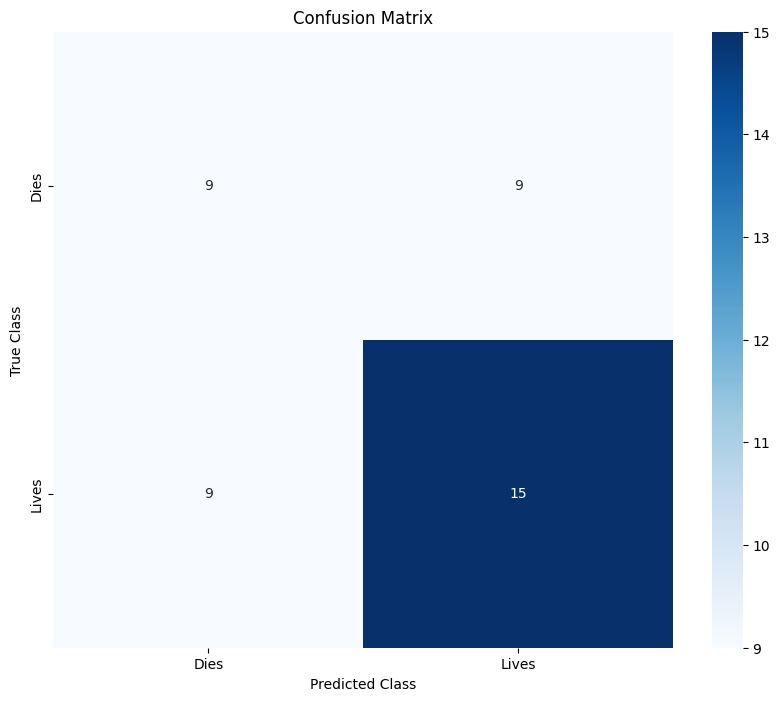

In [903]:

labels = ['Dies','Lives'] # Define os labels 

predictions = decision_tree_classifier.predict(testing_inputs) # previões dos valores dos inputs

conf_matrix = confusion_matrix(testing_classes, predictions) # Gerar a matriz de confusão 

#Caracteristicas da matriz 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Criação da Confusion Matrix 

### Visualização da árvore de decisão 

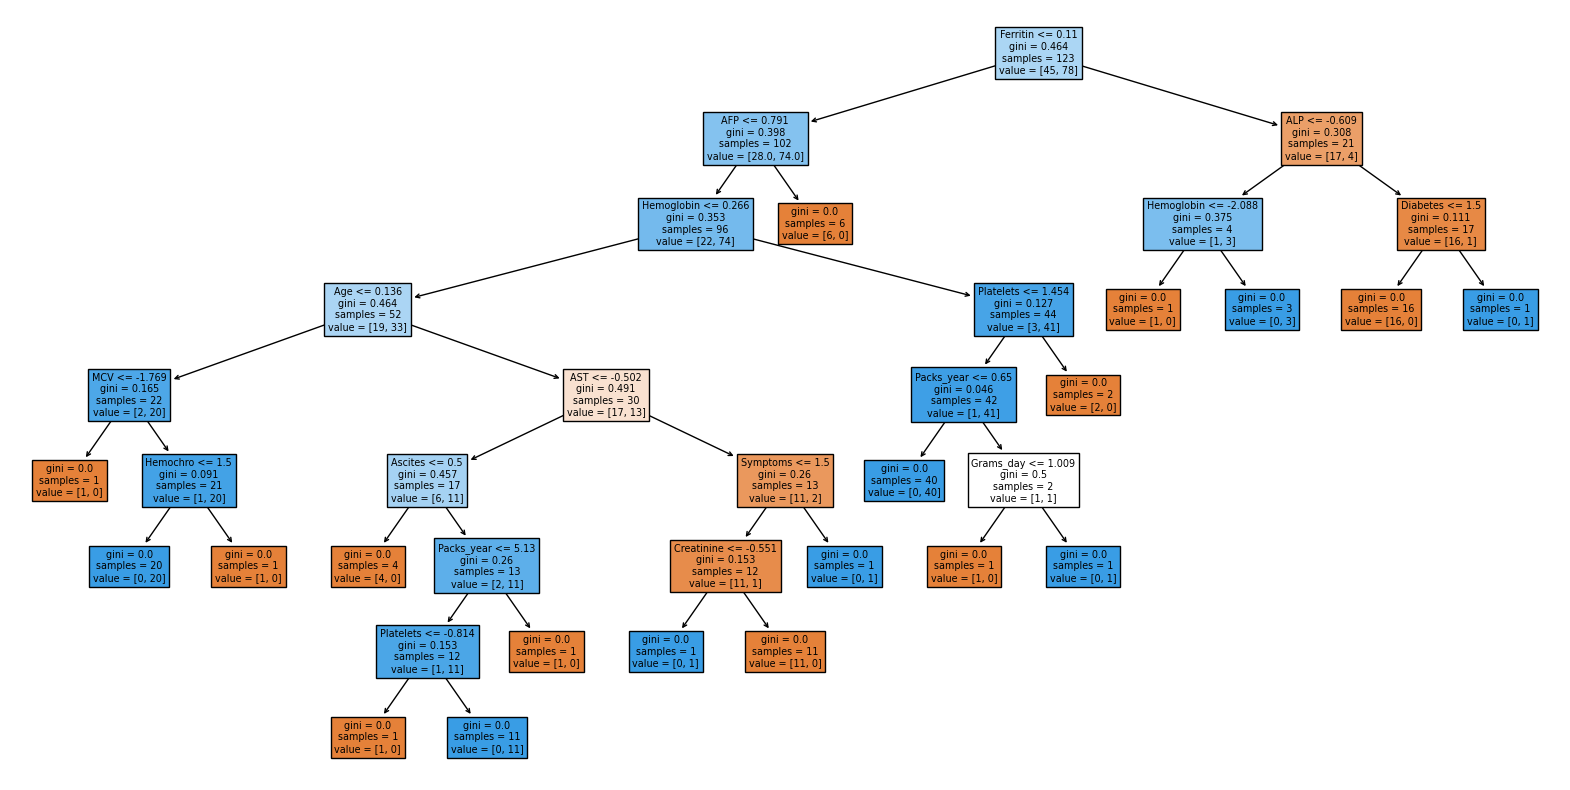

In [904]:

plt.figure(figsize=(20, 10))

plot_tree(decision_tree_classifier, 
          max_depth=None, 
          feature_names=df.columns, 
          class_names=None, 
          label='all', 
          filled=True, 
          impurity=True, 
          node_ids=False, 
          proportion=False, 
          rounded=False, 
          precision=3, 
          ax=None, 
          fontsize=None)

plt.show()


## Visualização do ROC/AUC 

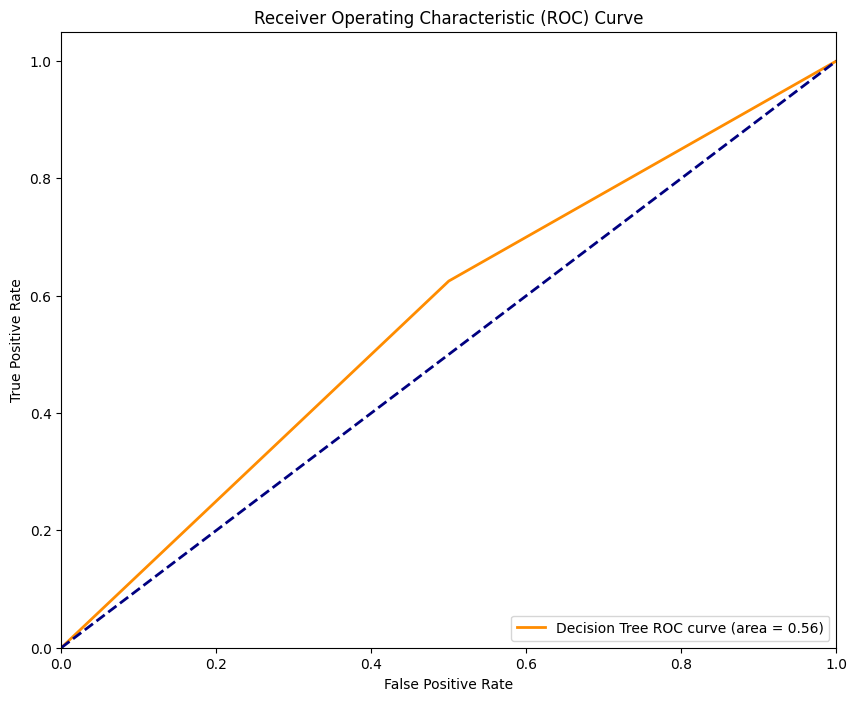

In [905]:
dt_fpr, dt_tpr,_  = roc_curve(testing_classes, dt_probs[:, 1]) # Faz as curvas do gráfico
dt_roc_auc = auc(dt_fpr, dt_tpr) # Area debaixo da curva ROC 

#Caracteristicas da matriz 
plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## "Decision Trees" repetição 

(array([ 10.,  42., 103., 234., 129., 226., 166.,  75.,  13.,   2.]),
 array([0.42857143, 0.47142857, 0.51428571, 0.55714286, 0.6       ,
        0.64285714, 0.68571429, 0.72857143, 0.77142857, 0.81428571,
        0.85714286]),
 <BarContainer object of 10 artists>)

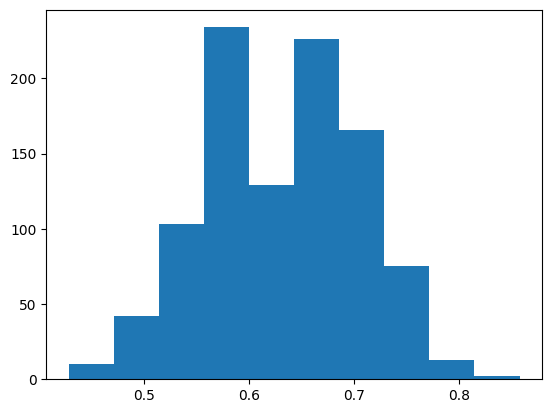

In [906]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

## KNN 

O algoritmo KNN não consegue ser aplicado em datasets com valores nulos, por tanto não vamos discutir a sua aplicação neste caso.

# Aplicação dos algoritmos no dataset MEDIANA/MODA 


Agora vamos observar de que maneira é que preencher o dataset com a mediana e a moda vai afetar na performace dos algoritmos.

## Decision Trees  

In [907]:
all_inputs = df_mediana_moda[['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']].values

all_labels = df_mediana_moda["Class"].values

In [908]:

(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25) 

In [909]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)

decision_tree_classifier.score(testing_inputs, testing_classes)

0.5714285714285714

###  Precision and Recall 

In [910]:
y_pred_test = decision_tree_classifier.predict(testing_inputs)

recall_tree = recall_score(testing_classes, y_pred_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 56.971%
Precision: 59.351%


In [911]:
dt_probs = decision_tree_classifier.predict_proba(testing_inputs)

### Confusion Matrix 

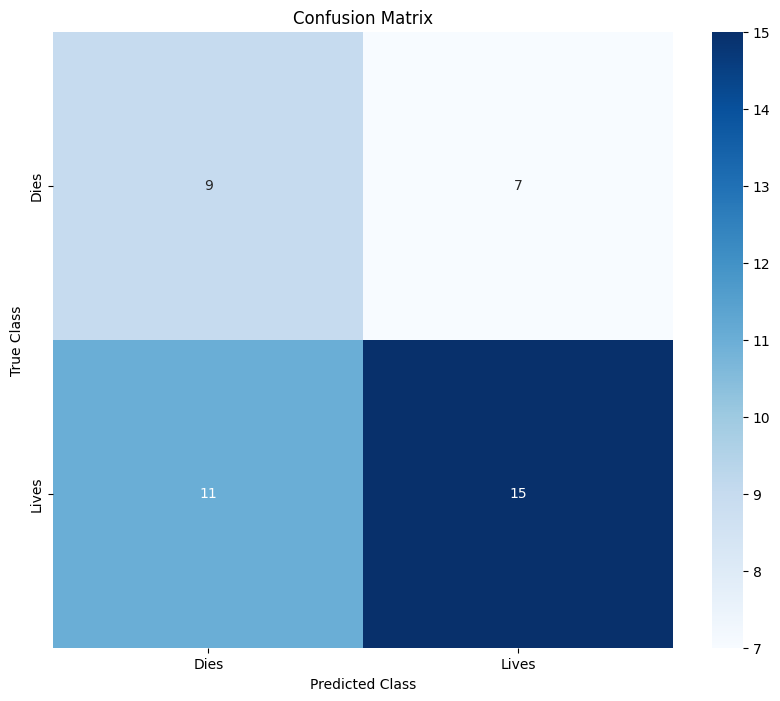

In [912]:
labels = ['Dies','Lives']

predictions = decision_tree_classifier.predict(testing_inputs)

conf_matrix = confusion_matrix(testing_classes, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


###  Visualização das árvore de decissão 

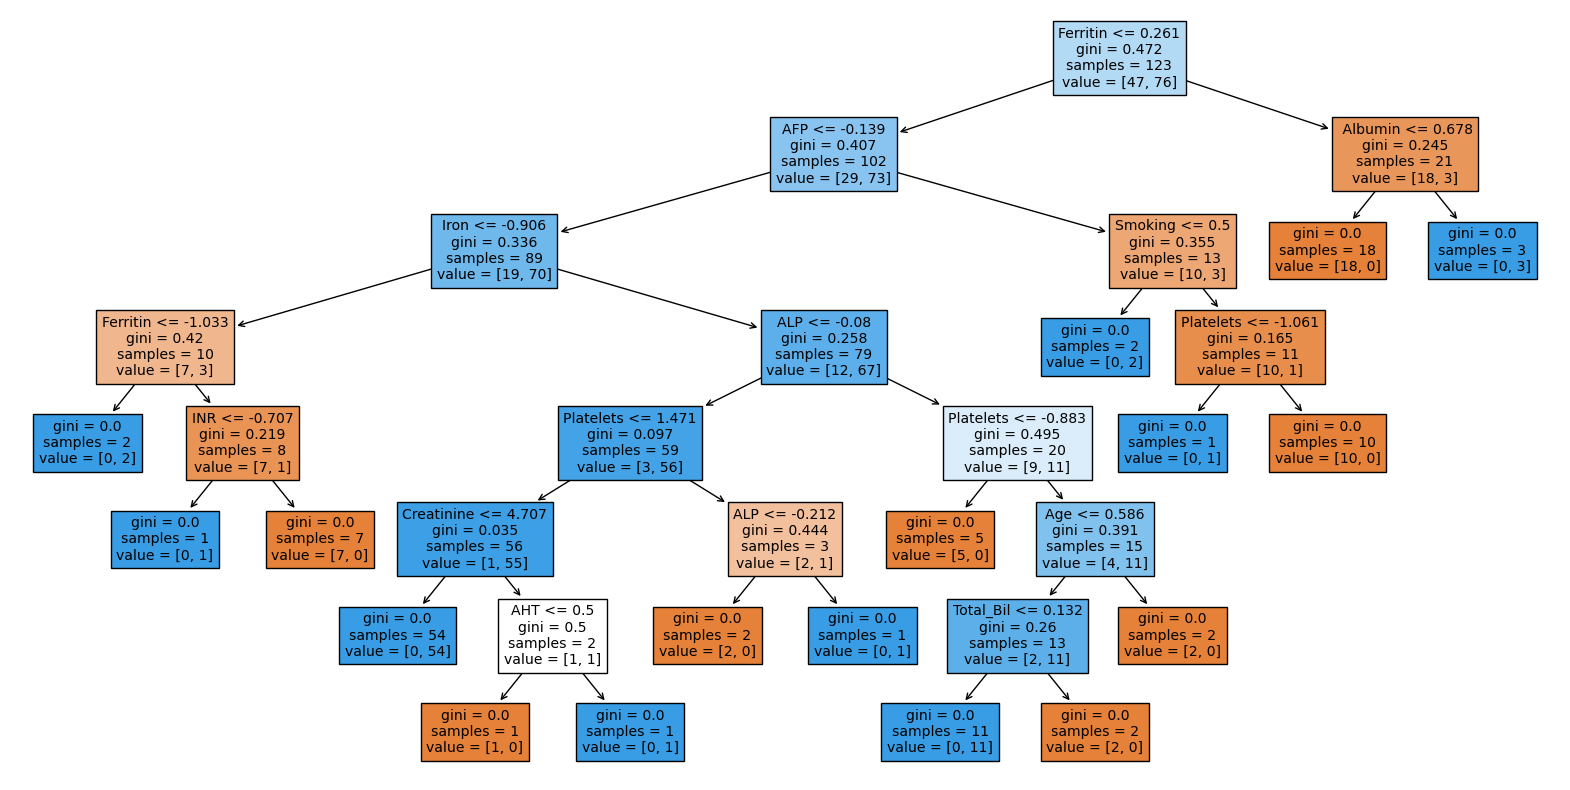

In [913]:
plt.figure(figsize=(20, 10))

plot_tree(decision_tree_classifier, 
          max_depth=None, 
          feature_names=df.columns, 
          class_names=None, 
          label='all', 
          filled=True, 
          impurity=True, 
          node_ids=False, 
          proportion=False, 
          rounded=False, 
          precision=3, 
          ax=None, 
          fontsize=None)

plt.show()

## KNN 

In [914]:
training_classes_series = pd.Series(training_classes)
testing_classes_series = pd.Series(testing_classes)

training_class_distribution = training_classes_series.value_counts() / len(training_classes_series) * 100
print("Distribuição no training Classes  (%):\n", training_class_distribution)

testing_class_distribution = testing_classes_series.value_counts() / len(testing_classes_series) * 100
print("Distribuição no testing Classes (%):\n", testing_class_distribution)

Distribuição no training Classes  (%):
 1    61.788618
0    38.211382
Name: count, dtype: float64
Distribuição no testing Classes (%):
 1    61.904762
0    38.095238
Name: count, dtype: float64


In [915]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(training_inputs, training_classes)

knn_preds_train = knn.predict(training_inputs)

knn_acc_train = sum(knn_preds_train == training_classes)/ len(training_classes)

knn_preds_test = knn.predict(testing_inputs)

knn_acc_test = sum(knn_preds_test == testing_classes)/ len(testing_classes)

In [916]:
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test) 

KNN Train Accuracy: 0.846
KNN Test Accuracy: 0.571


### Precision e Recall 

In [917]:
knn.fit(training_inputs, training_classes)
    
y_pred_knn_test = knn.predict(testing_inputs)
    
recall_tree = recall_score(testing_classes, y_pred_knn_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_knn_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 52.163%
Precision: 55.079%


In [918]:
knn_probs = knn.predict_proba(testing_inputs)

### Confusion Matrix 

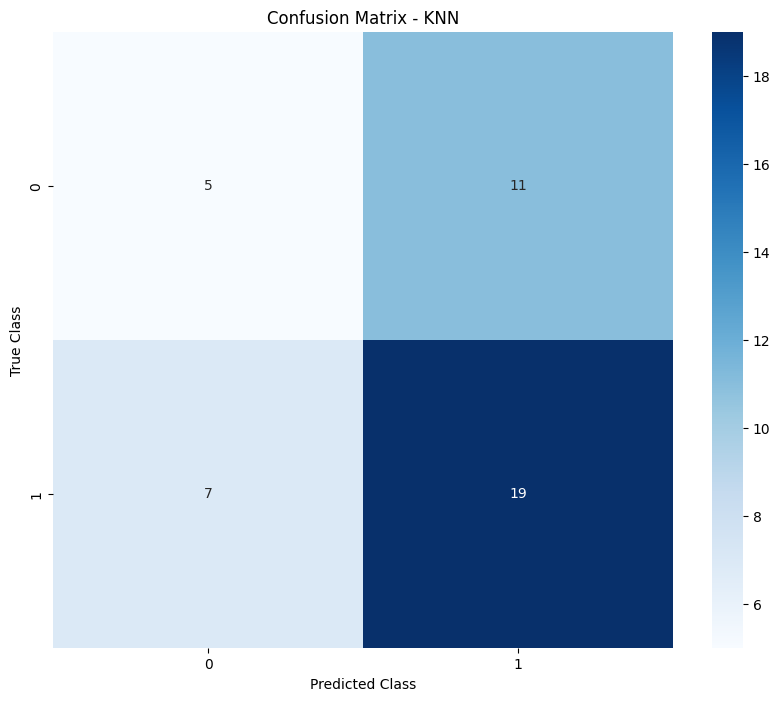

In [919]:
conf_matrix_knn = confusion_matrix(testing_classes, knn_preds_test)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Learning Curve 

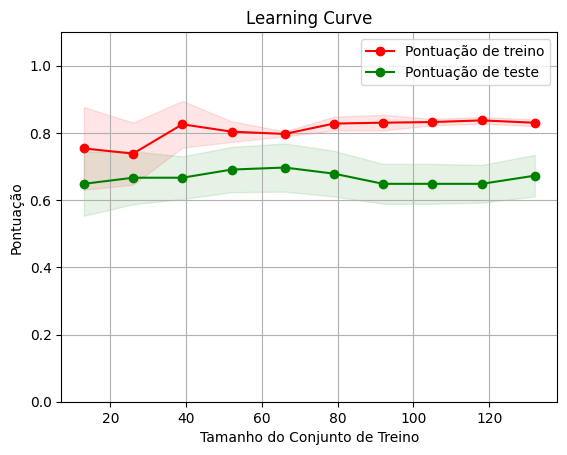

In [920]:

# Gerar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(
    knn, all_inputs, all_labels, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular médias e desvios padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.grid()

# Área sombreada para o desvio padrão
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Linhas das pontuações médias
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação de treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação de teste")

# Legenda
plt.legend(loc="best")

# Mostrar gráfico
plt.show()

## Visualização do ROC/AUC 

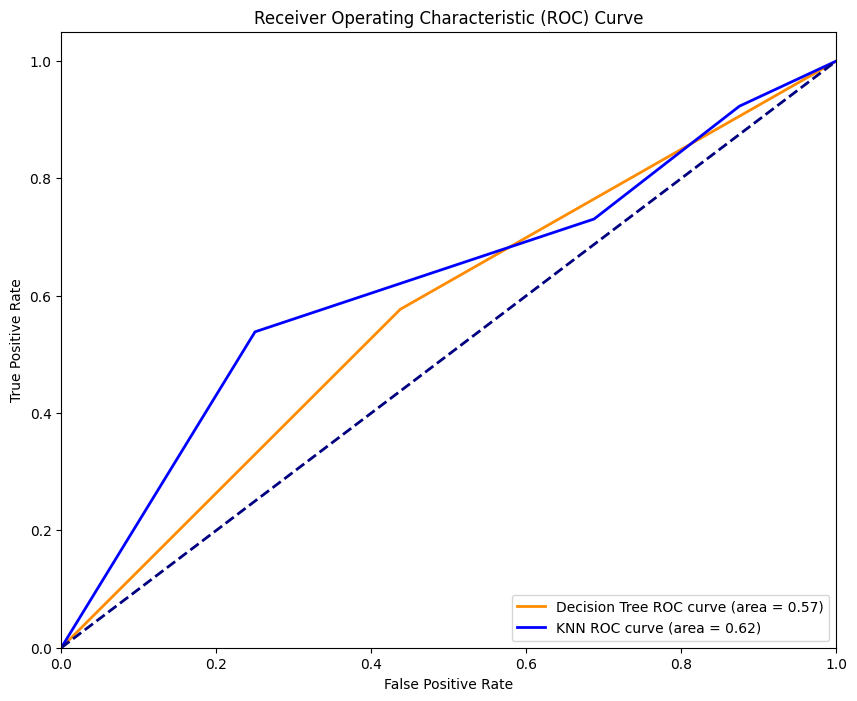

In [921]:
dt_fpr, dt_tpr,_  = roc_curve(testing_classes, dt_probs[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

knn_fpr, knn_tpr,_  = roc_curve(testing_classes, knn_probs[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## "Decision Trees" repetição 

(array([  6.,  23.,  94.,  79., 224., 274., 127., 120.,  40.,  13.]),
 array([0.42857143, 0.46904762, 0.50952381, 0.55      , 0.59047619,
        0.63095238, 0.67142857, 0.71190476, 0.75238095, 0.79285714,
        0.83333333]),
 <BarContainer object of 10 artists>)

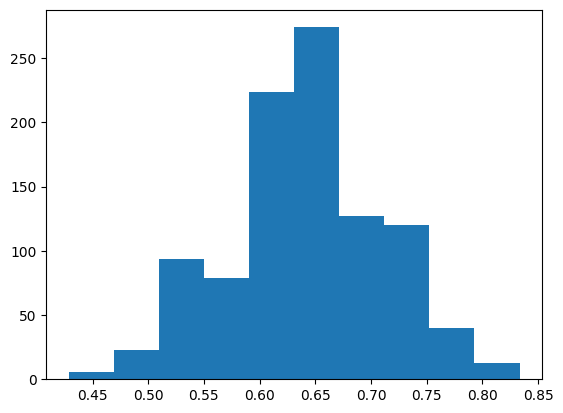

In [922]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

# Aplicação dos algoritmos no dataset com substituição por uso do KNN 

Agora vamos observar de que maneira é que preencher o dataset usando o KNN vai afetar na performace dos algoritmos.

## Decision Trees 

In [923]:
all_inputs = df_knn_inputer[['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron',
       'Sat', 'Ferritin']].values

all_labels = df_knn_inputer["Class"].values

In [924]:
(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25) 

In [925]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)

decision_tree_classifier.score(testing_inputs, testing_classes)

0.5952380952380952

### Precision e Recall 

In [926]:
y_pred_test = decision_tree_classifier.predict(testing_inputs)

recall_tree = recall_score(testing_classes, y_pred_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 56.667%
Precision: 60.130%


In [927]:
dt_probs = decision_tree_classifier.predict_proba(testing_inputs)

### Confusion Matrix 

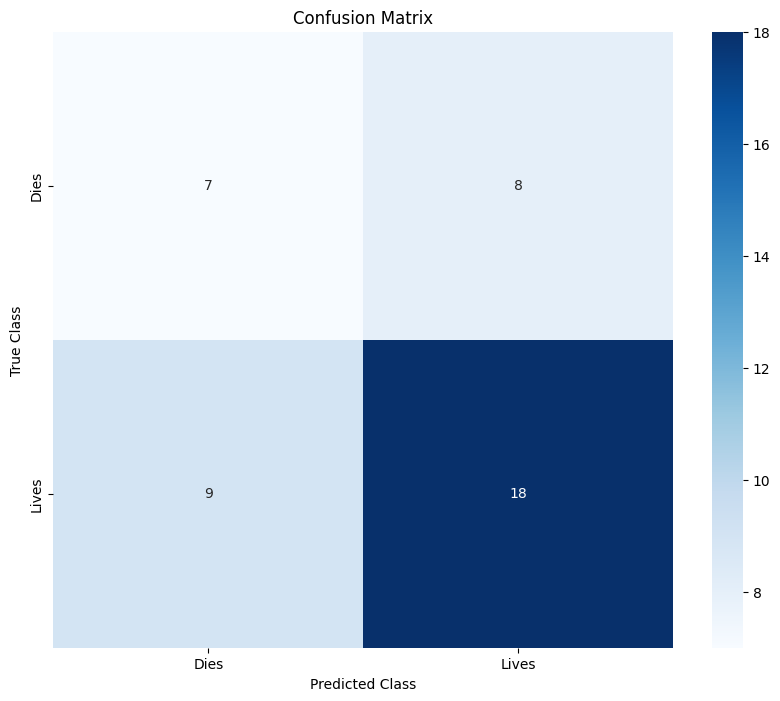

In [928]:
labels = ['Dies','Lives']

predictions = decision_tree_classifier.predict(testing_inputs)

conf_matrix = confusion_matrix(testing_classes, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


### Visualização da árvore de decissão 

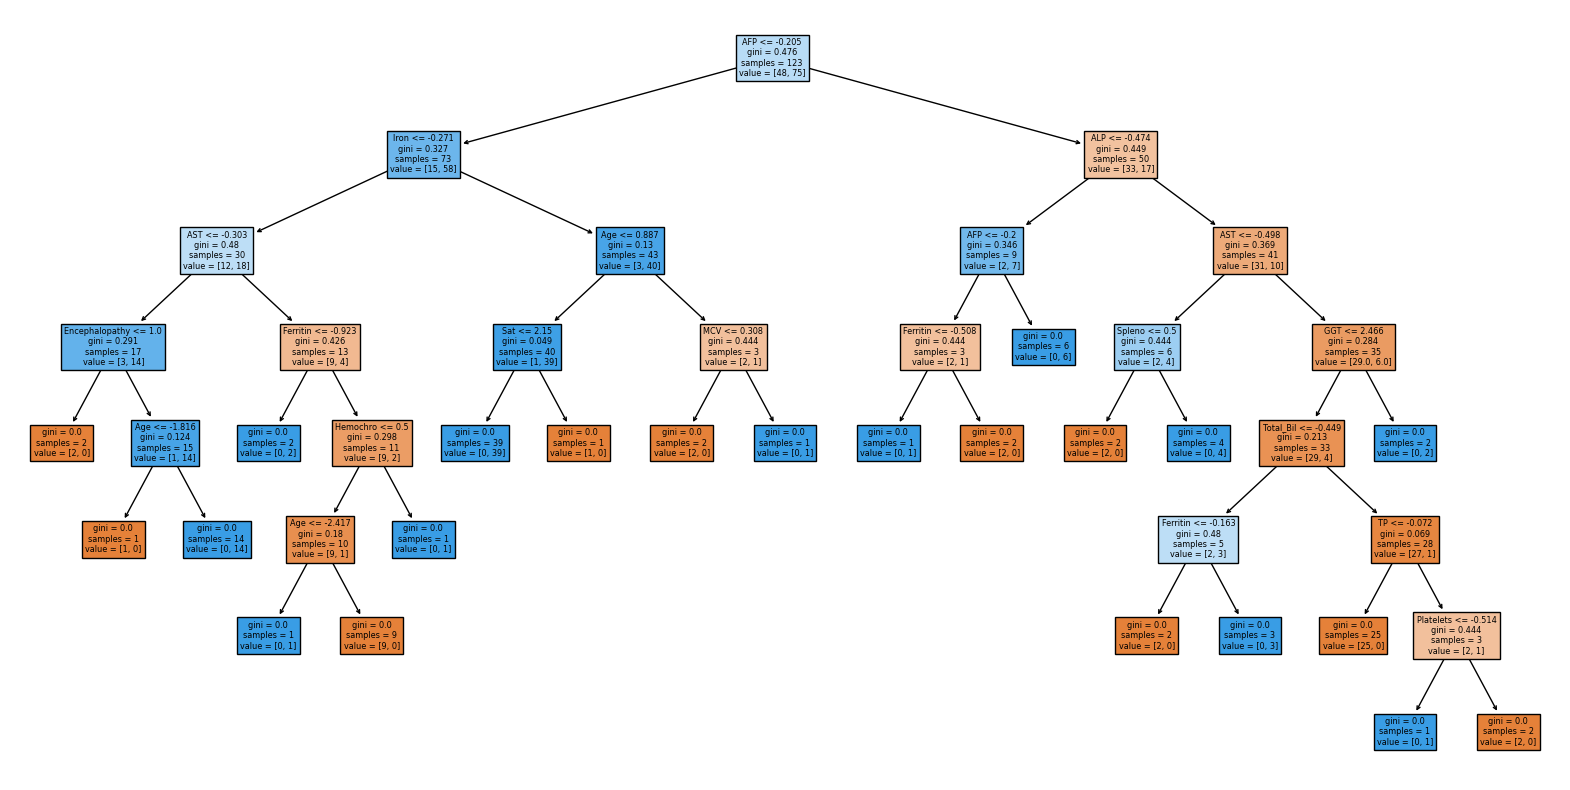

In [929]:
plt.figure(figsize=(20, 10))

plot_tree(decision_tree_classifier, 
          max_depth=None, 
          feature_names=df.columns, 
          class_names=None, 
          label='all', 
          filled=True, 
          impurity=True, 
          node_ids=False, 
          proportion=False, 
          rounded=False, 
          precision=3, 
          ax=None, 
          fontsize=None)

plt.show()

## KNN 

In [930]:
training_classes_series = pd.Series(training_classes)
testing_classes_series = pd.Series(testing_classes)

training_class_distribution = training_classes_series.value_counts() / len(training_classes_series) * 100
print("Distribuição no training Classes  (%):\n", training_class_distribution)

testing_class_distribution = testing_classes_series.value_counts() / len(testing_classes_series) * 100
print("Distribuição no testing Classes (%):\n", testing_class_distribution)

Distribuição no training Classes  (%):
 1.0    60.97561
0.0    39.02439
Name: count, dtype: float64
Distribuição no testing Classes (%):
 1.0    64.285714
0.0    35.714286
Name: count, dtype: float64


In [931]:
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(training_inputs, training_classes)

knn_preds_train = knn.predict(training_inputs)

knn_acc_train = sum(knn_preds_train == training_classes)/ len(training_classes)

knn_preds_test = knn.predict(testing_inputs)

knn_acc_test = sum(knn_preds_test == testing_classes)/ len(testing_classes)

In [932]:
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test) 

KNN Train Accuracy: 0.846
KNN Test Accuracy: 0.762


### Precision e Recall 

In [933]:
knn.fit(training_inputs, training_classes)
    
y_pred_knn_test = knn.predict(testing_inputs)
    
recall_tree = recall_score(testing_classes, y_pred_knn_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_knn_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 72.593%
Precision: 75.710%


In [934]:
knn_probs = knn.predict_proba(testing_inputs)

### Confusion Matrix 

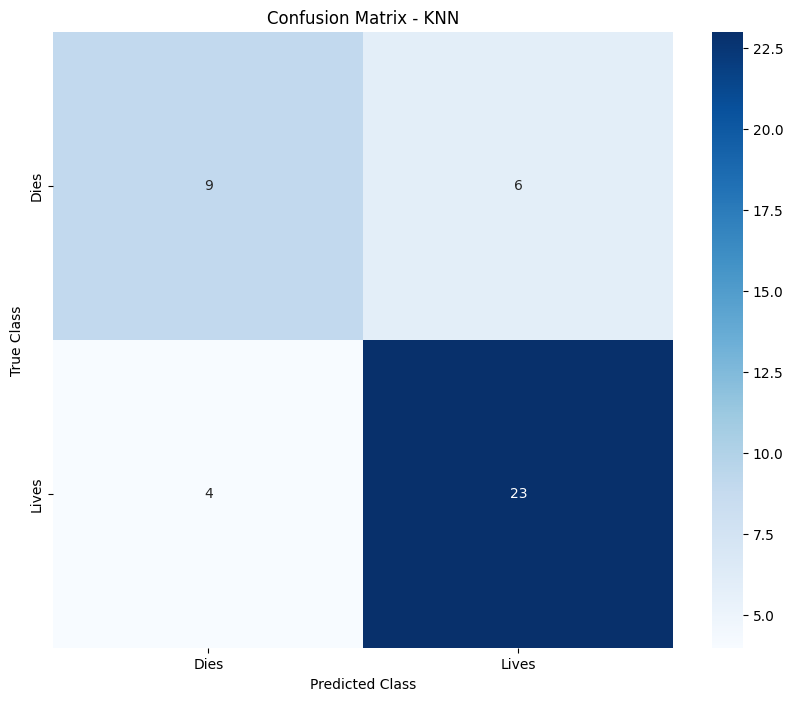

In [935]:
conf_matrix_knn = confusion_matrix(testing_classes, knn_preds_test)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Learning Curve 

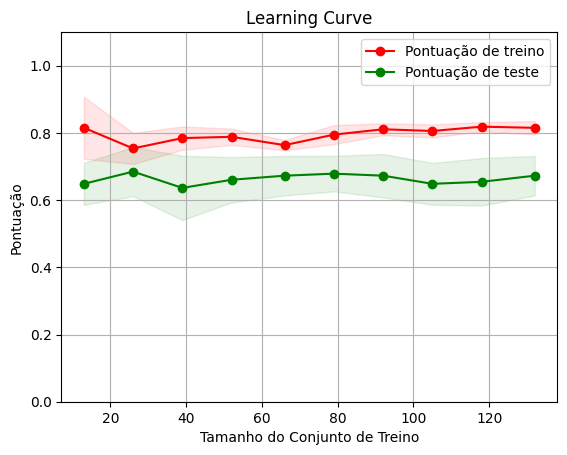

In [936]:
# Gerar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(
    knn, all_inputs, all_labels, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular médias e desvios padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.grid()

# Área sombreada para o desvio padrão
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Linhas das pontuações médias
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação de treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação de teste")

# Legenda
plt.legend(loc="best")

# Mostrar gráfico
plt.show()

## Visualização do ROC/AUC 

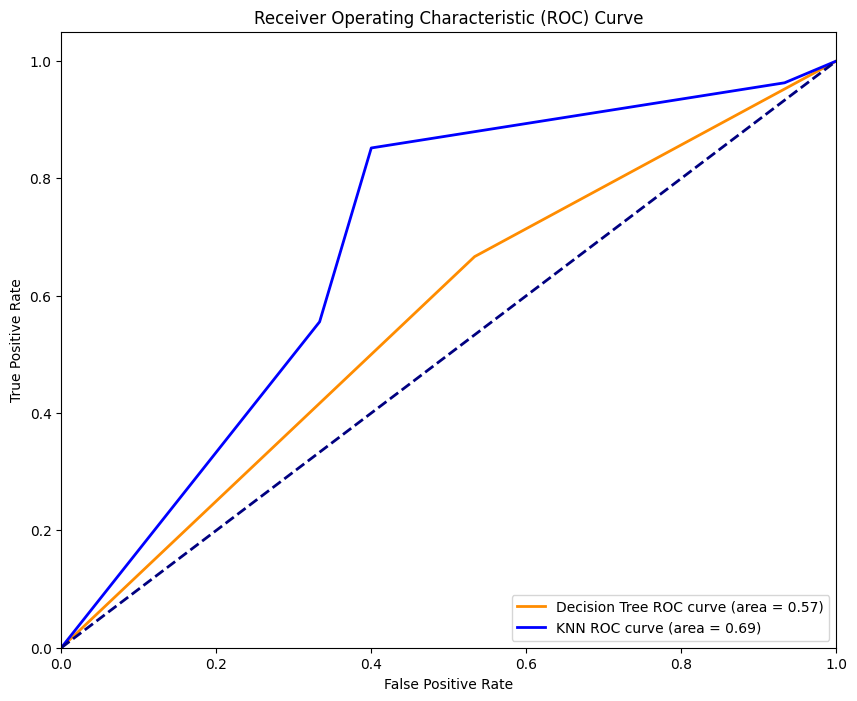

In [937]:
dt_fpr, dt_tpr,_  = roc_curve(testing_classes, dt_probs[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

knn_fpr, knn_tpr,_  = roc_curve(testing_classes, knn_probs[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## "Decision Trees" repetições 

(array([  8.,  28.,  93., 178., 101., 274., 191.,  92.,  29.,   6.]),
 array([0.4047619 , 0.44761905, 0.49047619, 0.53333333, 0.57619048,
        0.61904762, 0.66190476, 0.7047619 , 0.74761905, 0.79047619,
        0.83333333]),
 <BarContainer object of 10 artists>)

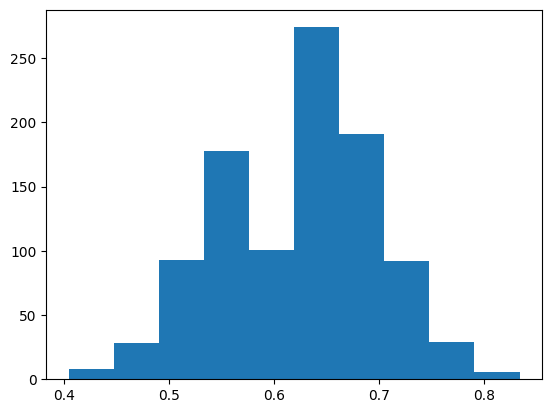

In [938]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

# Conclusões 

## Decision Trees 



### Desvantagens

Trabalha melhor com poucas variáveis. Neste projeto o elevado número de variáveis mostrou ser problemático, dado que o algoritmo só usou algumas delas. No entanto, esta questão pode ser resolvida em futuros trabalhos com recursos a florestas ou árvores reforçadas. Para além disso, o uso deste métodos pode tornar complexo o algoritmo retirando uma das suas vantagens.

Maior número de ramificações levam a uma adapatção excessiva e, por isso, devemos utilizar o menor número de variáveis possíveis.

## KNN 

O valor escolhido de K por questões de performace foi K = 3.


### Vantagens 

Muito preciso, principalmente quando comparado ao decision trees.

Em relação às decision tree, supera na precisão em ocorrências raras. 

Ao contrário de muitos algoritmos de machine learning, o KNN não tem um período de treino, os pŕopiros dados servem de referência para o futuro.


### Desvantagens 

Uma das principais desvantagens do KNN é o facto de que este não pode ser aplicado a um dataset com dados em falta. Como tal, para a sua aplicação, somos obrigados a preencher os dados ou a remover as linhas com dados em falta. 

A aletoriadade do KNN faz também com que os resultados obtidos a partir deste algoritmo possam variar bastante de execução para execução.

O KNN poderia também ter apresentado um maior tempo de execução para datasets com mais dados.

O KNN tem um hiperparametro, K-neighbours, que é necessário definir a priori 

## Resultados obtidos 

Devido à aleatoriadade dos algoritmos cálculamos os valores médios destas diferntes medidas para retirar conclusões 

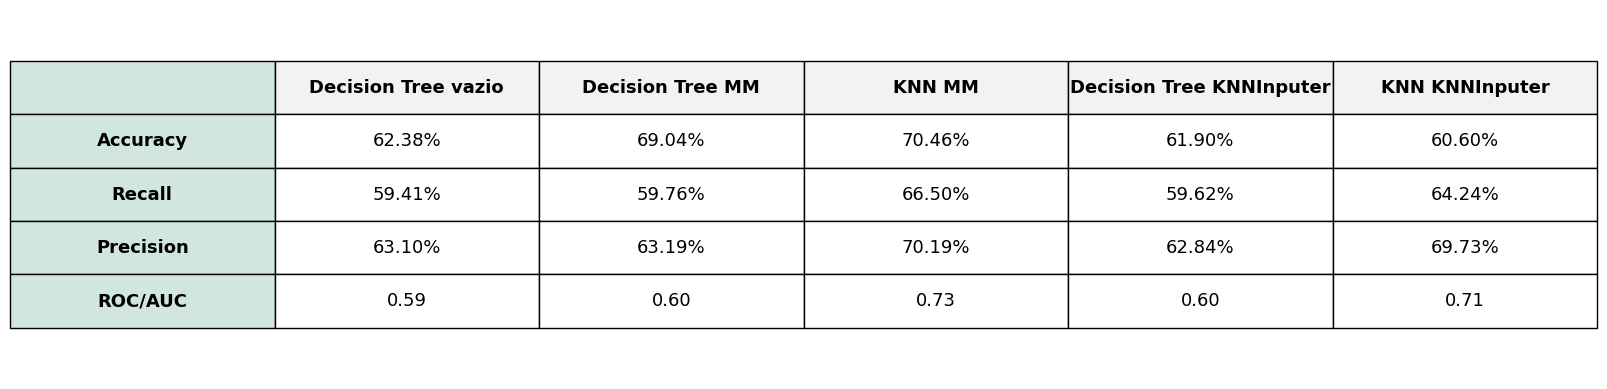

In [939]:
# Dados para a tabela
data = [
    ['', 'Decision Tree vazio', 'Decision Tree MM','KNN MM','Decision Tree KNNInputer','KNN KNNInputer'],
    ['Accuracy','62.38%' ,'69.04%','70.46%','61.90%','60.60%'],
    ['Recall', '59.41%', '59.76%','66.50%','59.62%','64.24%'],
    ['Precision', '63.10%', '63.19%','70.19%','62.84%','69.73%'],
    ['ROC/AUC','0.59','0.60','0.73','0.60','0.71']
]

# Converte os dados para um array numpy
data_array = np.array(data)

# Criar as divisões
fig, ax = plt.subplots()
ax.axis('off')

# Criar a tabela
table = ax.table(cellText=data[1:], colLabels=data[0], cellLoc='center', loc='center')

# Caracteristicas da tabela
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(3.2, 3.2)

# Colorir a primeira linha 
for (i, cell) in table.get_celld().items():
    cell.set_edgecolor('black')
    if i[0] == 0:  # Linha do cabeçalho
        cell.set_facecolor('#f2f2f2') 
        cell.set_text_props(weight='bold')  # Texto a negrito
    if i[1] == 0:  # Primeira coluna
        cell.set_facecolor('#d1e7dd') 
        cell.set_text_props(weight='bold')  # Texto a negrito

plt.show()

A partir desta tabela podemos concluir que preencher os dados que faltavam aumentou a "Accuracy","Recall","Precision","ROC/AUC" no "decision tree".

Confirmamos também que os valores obtidos no "KNN" são em média superiores aos obtitos no "decision tree" com o mesmo dataset. 

Os valores obtidos pelo KNN inputer eram expectáveis como sendo mais elevados que os restantes, no entanto os resultados obtidos podem ser atríbuidos a aleatoriadade dos algoritmos. 

## O que poderíamos ter feito de diferente e conlclusões acerca do dataset

Como mostrado pelas learning curves, a exestência de de um dataset maior não iria necessáriamente levar a algoritmos mais precissos, ou seja, consideramos apenas que em termos de alterções ao dataset estas deveriam ser relacionadas ao preenchimento de dados em falta.

Achamos por tanto que poderiamos ter usado outros métodos de preenchimento como por exemplo a escolha aleatória de valores em intervalos especificos para compensar a falta de variablidade do uso da mediana e moda.

Gostariamos também de ter testados outros métodos de divisão de dados como o cross validation de modo a obter resultados mais precissos nas comparações. 

Em termos dos algoritmos utilizados, achamos também que seria importante ter usado mais algoritmos,  em específico o decision trees, mas com recurso à entropia. 